<div style="background-color:#F7F2E0;">
<h1 style="font-family:Impact,Arial;font-size:50px;">  The impact of different educational levels on income status by region/country, age group, and gender.</h1>


<hr style="border: none; height: 2px; background-color: black;">

    
<h2>Abstract</h2>
<p>This project aims to use data from 44 OECD countries and regions, employing various graphical methods to mine and compare data. The objective is to discover, using methods learned over the semester:</p>
<ol>
    <li>Disparities in income across different countries.</li>
    <li>Whether there are differences in average salaries among different educational attainment groups.</li>
    <li>Whether there are gender differences in the starting salaries among different educational attainment groups.</li>
    <li>Whether salaries increase with age. If so, whether there are gender differences in this relationship.</li>
    <li>The proportion of genders, ages, and educational attainment levels in different income brackets, by country.</li>
    <li>A comparison of income fairness between countries in different regions.</li>
</ol>
<p>The results reveal that the level of education significantly impacts income, with this influence being significant across different age groups, genders, and countries/regions.</p>
<hr style="border: none; height: 2px; background-color: black;">



</div>

![OECD Data on Educational Attainment and Labor Force Status](https://vdc.edu.au/wp-content/uploads/2024/11/241030-Ed-21-Image-4.jpg)

<div style="background-color:#F7F2E0;">
<hr style="border: none; height: 2px; background-color: black;">
</div>

<div style="background-color:#F7F2E0;">
  <h2>3. Data Preparation</h2>
  <p>The goal of data preparation is to convert raw data into a clean and structured format suitable for statistical analysis and visualization.</p>

  <p>This step typically includes:</p>
  <ul>
    <li><b>Data Cleaning</b>: Removing missing values, duplicates, or incorrect entries.</li>
    <li><b>Data Transformation</b>: Adjusting variable types, encoding categorical data, or scaling values.</li>
    <li><b>Feature Engineering</b>: Creating new variables that capture important patterns or relationships.</li>
    <li><b>Data Integration</b>: Merging multiple datasets or data sources if necessary.</li>
  </ul>

  <p><b>What to include:</b></p>
  <ul>
    <li>Code cells that load the raw data into a dataframe.</li>
    <li>Cleaning and transformation steps, with explanations.</li>
    <li>Markdown commentary for each step to explain <i>why</i> it is needed.</li>
    <li>Optional summary statistics or plots to confirm the data is ready for analysis.</li>
  </ul>

  <p>Use a combination of code, markdown, and raw cells to clearly document your process.</p>
  <hr style="border: none; height: 2px; background-color: black;">
</div>

<div style="background-color:#F7F2E0;"><h3><font color=MediumVioletRed>Importing:</font></h3>
Initially we import all the various modules we will be using throughout this overall project, whenever we require a new module we return here to import the relevant module to keep the code more readable

In [128]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path
import datetime
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color:#F7F2E0;"><h3><font color=MediumVioletRed>Reading the Data:</font></h3> Read the file from file location using a pandas function

In [129]:
data_ed =pd.read_csv('EAG_EARNINGS_20052024144922210.csv',encoding='ISO-8859-1')
data_ed.head()

,COUNTRY,Country,ISC11A,ISC11A.1,SEX,Gender,AGE,Age,EARN_CATEGORY,EARN_CATEGORY.1,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUT,Austria,L5,Short-cycle tertiary education,F,Women,Y55T64,55-64 years,FTFY_EARNERS,"Full-time, full-year earners",...,Latest available year,PC,Percentage,0,Units,2021.0,2021.0,117.68150,NaN,NaN
1,HUN,Hungary,L5,Short-cycle tertiary education,M,Men,Y55T64,55-64 years,FTFY_EARNERS,"Full-time, full-year earners",...,Latest available year,PC,Percentage,0,Units,2021.0,2021.0,129.87090,NaN,NaN
2,DNK,Denmark,L0T2,Below upper secondary education,T,Total,Y25T34,25-34 years,FTFY_EARNERS,"Full-time, full-year earners",...,Latest available year,PC,Percentage,0,Units,2021.0,2021.0,92.13712,NaN,NaN
3,IRL,Ireland,L5,Short-cycle tertiary education,T,Total,Y55T64,55-64 years,FTFY_EARNERS,"Full-time, full-year earners",...,Latest available year,PC,Percentage,0,Units,2020.0,2020.0,110.55130,NaN,NaN
4,CHL,Chile,L5,Short-cycle tertiary education,T,Total,Y25T34,25-34 years,FTFY_EARNERS,"Full-time, full-year earners",...,Latest available year,PC,Percentage,0,Units,2017.0,2017.0,123.23660,NaN,NaN


<div style="background-color:#F7F2E0;">
<div style="background-color:#F7F2E0;"><h3><font color=MediumVioletRed>Begin Cleaning the Data:</font></h3>
Counts the non-null entries in each column of the dataset to assess the completeness of the data.
</div>

In [130]:
data_ed.count()

,0
COUNTRY,16902
Country,16902
ISC11A,16902
ISC11A.1,16902
SEX,16902
Gender,16902
AGE,16902
Age,16902
EARN_CATEGORY,16902
EARN_CATEGORY.1,16902


<div style="background-color:#F7F2E0;">
Remove unnecessary columns and keep the columns that need to be analyzed in focus.
</div>

In [131]:
data_ed.drop(['COUNTRY','ISC11A', 'Gender', 'AGE', 'EARN_CATEGORY', 'YEAR', 'Year','MEASURE', 'Measure', 'INDICATOR', 'Indicator' ,'Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Flag Codes','Flags'],
          axis=1,
          inplace=True)
data_ed.head()

,Country,ISC11A.1,SEX,Age,EARN_CATEGORY.1,Reference Period,Value
0,Austria,Short-cycle tertiary education,F,55-64 years,"Full-time, full-year earners",2021.0,117.68150
1,Hungary,Short-cycle tertiary education,M,55-64 years,"Full-time, full-year earners",2021.0,129.87090
2,Denmark,Below upper secondary education,T,25-34 years,"Full-time, full-year earners",2021.0,92.13712
3,Ireland,Short-cycle tertiary education,T,55-64 years,"Full-time, full-year earners",2020.0,110.55130
4,Chile,Short-cycle tertiary education,T,25-34 years,"Full-time, full-year earners",2017.0,123.23660


<div style="background-color:#F7F2E0;">
The columns Reference Period and Value have missing data, which might need to be addressing.
</div>


In [132]:
all_median =data_ed['Value'].median()
data_ed['Value'] = data_ed['Value'].fillna(all_median)
data_ed.isna().sum()

,0
Country,0
ISC11A.1,0
SEX,0
Age,0
EARN_CATEGORY.1,0
Reference Period,1296
Value,0


<div style="background-color:#F7F2E0;">
Fill the missing value in the 'Value' column  with Median and check again.
</div>



In [133]:
all_median = data_ed['Value'].median()
data_ed['Value'] = data_ed['Value'].fillna(all_median)
print(data_ed.isna().sum())

Country                0
ISC11A.1               0
SEX                    0
Age                    0
EARN_CATEGORY.1        0
Reference Period    1296
Value                  0
dtype: int64


<div style="background-color:#F7F2E0;">
The missing values in the Value column have been successfully filled, and there are still missing values in'Reference Period' column. Check the values in 'Reference Period' column.
</div>


In [134]:
data_ed.loc[:, 'Reference Period'].value_counts()

,count
Reference Period,
2021.0,9180
2020.0,4374
2018.0,1188
2017.0,432
2019.0,432


<div style="background-color:#F7F2E0;">
Fill missing values with 2021, as  2021 being the most common reference year.
</div>


In [145]:
print(data_ed.columns)

Index(['Country', 'ISC11A.1', 'SEX', 'Age', 'EARN_CATEGORY.1',
       'Reference Period', 'Value'],
      dtype='object')


In [146]:
data_ed['Reference Period'] = data_ed['Reference Period'].fillna(2021)
print(data_ed['Reference Period'].isna().sum())

0


In [ ]:
data_ed['Reference Period'].astype(int)
print(data_ed.dtypes)

<div style="background-color:#F7F2E0;"> Renaming the columns of our data set so it is easier to understand.

In [147]:
data_ed.rename(columns={'ISC11A.1': 'Education','SEX':'Gender','EARN_CATEGORY.1':'Category','Reference Period':'Year'},inplace = True)

data_ed.head(5)

,Country,Education,Gender,Age,Category,Year,Value
0,Austria,Short-cycle tertiary education,F,55-64 years,"Full-time, full-year earners",2021.0,117.68150
1,Hungary,Short-cycle tertiary education,M,55-64 years,"Full-time, full-year earners",2021.0,129.87090
2,Denmark,Below upper secondary education,T,25-34 years,"Full-time, full-year earners",2021.0,92.13712
3,Ireland,Short-cycle tertiary education,T,55-64 years,"Full-time, full-year earners",2020.0,110.55130
4,Chile,Short-cycle tertiary education,T,25-34 years,"Full-time, full-year earners",2017.0,123.23660


<div style="background-color:#F7F2E0;"> As education is largely placed in hard to interpret values we will record each of them and then convert them to categories that make more sense and easier to visualise.

In [148]:
data_ed['Education'].unique()

array(['Short-cycle tertiary education',
       'Below upper secondary education',
       'Post-secondary non-tertiary education',
       'Bachelor\x92s or equivalent education',
       'Master\x92s, Doctoral or equivalent education',
       "Bachelor's, Master\x92s, Doctoral or equivalent education",
       'Tertiary education',
       'Upper secondary, post-secondary non-tertiary education and short-cycle tertiary education'],
      dtype=object)

<div style="background-color:#F7F2E0;">
Placing each data point into a more relevant and readable data category for future analysis. Then we also remove the umlaut from Türkiye to make it simpler to write code around in future.


Other values that are not conducive to analysis shouldalso be replaced with ones that are easier to understand and analyze.
</div>



In [149]:
data_ed['Education']=data_ed['Education'].str.replace("Bachelor\x92s or equivalent education","Bachelor")
data_ed['Education']=data_ed['Education'].str.replace("Bachelor's, Master\x92s, Doctoral or equivalent education","Bachelor and Above")
data_ed['Education']=data_ed['Education'].str.replace("Master\x92s, Doctoral or equivalent education", "Master and  Above")
data_ed['Education']=data_ed['Education'].str.replace("Short-cycle tertiary education","Short-tertiary")
data_ed['Education']=data_ed['Education'].str.replace("Bachelor's, Master\x92s, Doctoral or equivalent education","Bachelor and Above")
data_ed['Education']=data_ed['Education'].str.replace("Tertiary education","Tertiary")
data_ed['Age']=data_ed['Age'].str.replace("25-64 years", '35-54 years')
data_ed['Country']=data_ed['Country'].str.replace("EU25: European Union of twenty-five", 'EU25')


data_ed['Education'] = data_ed['Education'].replace({
    'Below upper secondary education': 'Non-Tertiary',
    'Post-secondary non-tertiary education': 'Non-Tertiary',
    'Upper secondary, post-secondary non-tertiary education and short-cycle tertiary education': 'Non-Tertiary'
})


data_ed['Category']=data_ed['Category'].replace({
    "Full-time, full-year earners":"Full-time",
    "All earners":"Part-time"
})

print(data_ed['Education'].unique())
print(data_ed['Category'].unique())

data_ed['Country']=data_ed['Country'].str.replace(r'.*iye.*','Turkiye', regex= True)

data_ed[data_ed['Country']=='Turkiye'].head(5)

['Short-tertiary' 'Non-Tertiary' 'Bachelor' 'Master and  Above'
 'Bachelor and Above' 'Tertiary']
['Full-time' 'Part-time']


,Country,Education,Gender,Age,Category,Year,Value
10,Turkiye,Short-tertiary,F,55-64 years,Part-time,2021.0,135.88390
63,Turkiye,Non-Tertiary,F,55-64 years,Part-time,2021.0,135.88390
93,Turkiye,Non-Tertiary,M,55-64 years,Full-time,2021.0,66.24439
193,Turkiye,Non-Tertiary,F,35-54 years,Full-time,2021.0,135.88390
236,Turkiye,Bachelor,T,35-54 years,Part-time,2021.0,135.88390


<div style="background-color:#F7F2E0;">
Check the data types and perform necessary data type conversions.analyze.
</div>



In [152]:
print(data_ed.dtypes)

Country      category
Education    category
Gender       category
Age          category
Category       object
Year         category
Value         float64
dtype: object


In [151]:
data_ed_type=['Country','Education','Gender','Age','Year']

for column in data_ed_type:
    data_ed[column]= data_ed[column].astype('category')

data_ed['Year'].astype('int')##can't converted to int
print(data_ed.dtypes)

Country      category
Education    category
Gender       category
Age          category
Category       object
Year         category
Value         float64
dtype: object


<div style="background-color:#F7F2E0;">
Check the values in 'Country' column.
</div>


In [153]:
unique_countries = data_ed['Country'].unique()
print(unique_countries.tolist())

['Austria', 'Hungary', 'Denmark', 'Ireland', 'Chile', 'Slovak Republic', 'Poland', 'Luxembourg', 'Netherlands', 'Turkiye', 'Colombia', 'Portugal', 'New Zealand', 'United Kingdom', 'Czechia', 'Canada', 'Finland', 'OECD - Average', 'G20', 'Mexico', 'Sweden', 'Australia', 'Costa Rica', 'Korea', 'Slovenia', 'Spain', 'France', 'Belgium', 'Brazil', 'Germany', 'Lithuania', 'Italy', 'Estonia', 'Switzerland', 'Norway', 'United States', 'Israel', 'Latvia', 'Greece', 'Argentina', 'EU25', 'Bulgaria', 'Romania']


<div style="background-color:#F7F2E0;"> Categorising each of the sampled countries into a relevant continent, Continents are not strictly defined and can vary based on source so some level of arbitrary deciding has to be done for countries such as Hungary into Europe or Asia. Furthermore the Middle East is more self similar in terms of economics and governmental procedures than the rest of Asia and thus was given a seperate category.
Our dataset does not contain any African countries and thus is not used as a category

In [154]:
data_ed.Country.unique()
country_to_region = {
    'Austria': 'Europe',
    'Hungary': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Chile': 'South America',
    'Slovak Republic': 'Europe',
    'Poland': 'Europe',
    'Luxembourg': 'Europe',
    'Netherlands': 'Europe',
    'Turkiye': 'Asia',
    'Colombia': 'South America',
    'Portugal': 'Europe',
    'New Zealand': 'Oceania',
    'United Kingdom': 'Europe',
    'Czechia': 'Europe',
    'Canada': 'North America',
    'Finland': 'Europe',
    'Mexico': 'North America',
    'Sweden': 'Europe',
    'Australia': 'Oceania',
    'Costa Rica': 'Central America',
    'Korea': 'Asia',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'France': 'Europe',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Germany': 'Europe',
    'Lithuania': 'Europe',
    'Italy': 'Europe',
    'Estonia': 'Europe',
    'Switzerland': 'Europe',
    'Norway': 'Europe',
    'United States': 'North America',
    'Israel': 'Middle East',
    'Latvia': 'Europe',
    'Greece': 'Europe',
    'Argentina': 'South America',
    'Bulgaria': 'Europe',
    'Romania': 'Europe'
}

data_ed['Region']=data_ed['Country'].map(country_to_region)
data_ed.head()

,Country,Education,Gender,Age,Category,Year,Value,Region
0,Austria,Short-tertiary,F,55-64 years,Full-time,2021.0,117.68150,Europe
1,Hungary,Short-tertiary,M,55-64 years,Full-time,2021.0,129.87090,Europe
2,Denmark,Non-Tertiary,T,25-34 years,Full-time,2021.0,92.13712,Europe
3,Ireland,Short-tertiary,T,55-64 years,Full-time,2020.0,110.55130,Europe
4,Chile,Short-tertiary,T,25-34 years,Full-time,2017.0,123.23660,South America


<div style="background-color:#F7F2E0;"> Count the amount of data points in each category to grant insight into possible issues with balancing and also confirming we have successfully cleaned the data.

In [155]:
data_ed['Category'].unique()

array(['Full-time', 'Part-time'], dtype=object)

In [156]:
data_ed['Age'].unique()

['55-64 years', '25-34 years', '35-54 years']
Categories (3, object): ['25-34 years', '35-54 years', '55-64 years']

In [157]:
data_ed.Education.value_counts()

,count
Education,
Non-Tertiary,5292
Bachelor,2322
Bachelor and Above,2322
Master and Above,2322
Short-tertiary,2322
Tertiary,2322


In [137]:
print(data_ed['Country'].value_counts())

Country
Chile                                  432
Netherlands                            432
Lithuania                              432
Brazil                                 432
France                                 432
Spain                                  432
G20                                    432
Canada                                 432
Finland                                432
OECD - Average                         432
Czechia                                432
EU25: European Union of twenty-five    432
Colombia                               378
Luxembourg                             378
Poland                                 378
Ireland                                378
Slovak Republic                        378
Hungary                                378
Denmark                                378
Austria                                378
Türkiye                                378
New Zealand                            378
Sweden                                 378
Cos

In [158]:
data_ed.Gender.value_counts()

,count
Gender,
F,5634
M,5634
T,5634


In [ ]:
data_ed.groupby(['Gender', 'Age'], observed=True).size().unstack()


<div style="background-color:#F7F2E0;">
Take a quick look at the structure of the prepared dataset once again, this time at 20 rows.
</div>

In [159]:
data_ed.head(20)

,Country,Education,Gender,Age,Category,Year,Value,Region
0,Austria,Short-tertiary,F,55-64 years,Full-time,2021.0,117.68150,Europe
1,Hungary,Short-tertiary,M,55-64 years,Full-time,2021.0,129.87090,Europe
2,Denmark,Non-Tertiary,T,25-34 years,Full-time,2021.0,92.13712,Europe
3,Ireland,Short-tertiary,T,55-64 years,Full-time,2020.0,110.55130,Europe
4,Chile,Short-tertiary,T,25-34 years,Full-time,2017.0,123.23660,South America
5,Slovak Republic,Non-Tertiary,T,35-54 years,Part-time,2021.0,135.88390,Europe
6,Poland,Bachelor,M,35-54 years,Part-time,2020.0,146.61230,Europe
7,Luxembourg,Master and Above,F,25-34 years,Full-time,2021.0,149.79780,Europe
8,Netherlands,Short-tertiary,T,35-54 years,Part-time,2021.0,139.02680,Europe
9,Chile,Bachelor and Above,T,25-34 years,Part-time,2017.0,220.12720,South America


<hr style="border: none; height: 2px; background-color: black;">

<div style="background-color:#F2FBEF;">
<h2>4. Exploratory data analysis</h2>
<p>Always be careful to focus on the 6 main issues that are in the proposal：</p>
<ol>
    <li>Disparities in income across different countries.</li>
    <li>Whether there are differences in average salaries among different educational attainment groups.</li>
    <li>Whether there are gender differences in the starting salaries among different educational attainment groups.</li>
    <li>Whether salaries increase with age. If so, whether there are gender differences in this relationship.</li>
    <li>The proportion of genders, ages, and educational attainment levels in different income brackets, by country.</li>
    <li>A comparison of income fairness between countries in different regions.</li>
</ol>
    
  
</div>

<div style="background-color:#F2FBEF;">
<p>Quickly view median and average salaries by country/organization. country_income_median and country_income_mean will be used later.</p>
    
<p>Interestingly, Chile has the highest median and average salary. Central and South American countries show high income levels, while European countries, which are traditionally perceived as high-income countries, do not rank as high in income levels</p>
        
</div>

In [160]:
country_income_median = data_ed.groupby('Country')['Value'].median().sort_values(ascending=False).reset_index()
country_income_mean = data_ed.groupby('Country')['Value'].mean().sort_values(ascending=False).reset_index()
print(country_income_median)
print(country_income_mean)


            Country      Value
0             Chile  172.07275
1     United States  166.99820
2            Israel  157.57885
3        Costa Rica  156.22485
4            Latvia  153.21760
5           Hungary  150.99035
6           Ireland  144.77190
7    United Kingdom  142.52665
8            Mexico  139.60795
9           Germany  137.82620
10            Spain  137.22200
11           Poland  136.18010
12        Argentina  136.16975
13      Switzerland  135.88390
14       Luxembourg  135.88390
15           Brazil  135.88390
16          Belgium  135.88390
17         Bulgaria  135.88390
18         Colombia  135.88390
19          Turkiye  135.88390
20         Slovenia  135.88390
21        Lithuania  135.88390
22            Korea  135.88390
23            Italy  135.88390
24             EU25  135.88390
25           France  135.88390
26              G20  135.88390
27  Slovak Republic  135.88390
28          Romania  135.88390
29   OECD - Average  135.88390
30         Portugal  135.88390
31      

/tmp/ipython-input-160-3956369919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_income_median = data_ed.groupby('Country')['Value'].median().sort_values(ascending=False).reset_index()
/tmp/ipython-input-160-3956369919.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_income_mean = data_ed.groupby('Country')['Value'].mean().sort_values(ascending=False).reset_index()


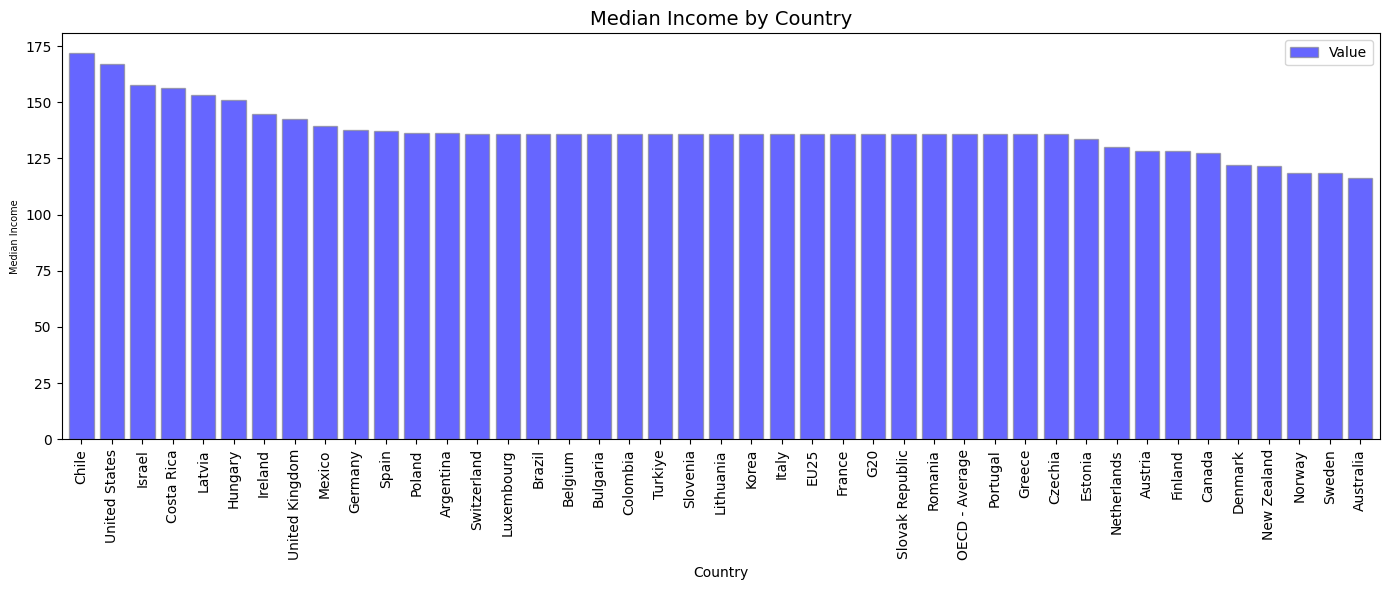

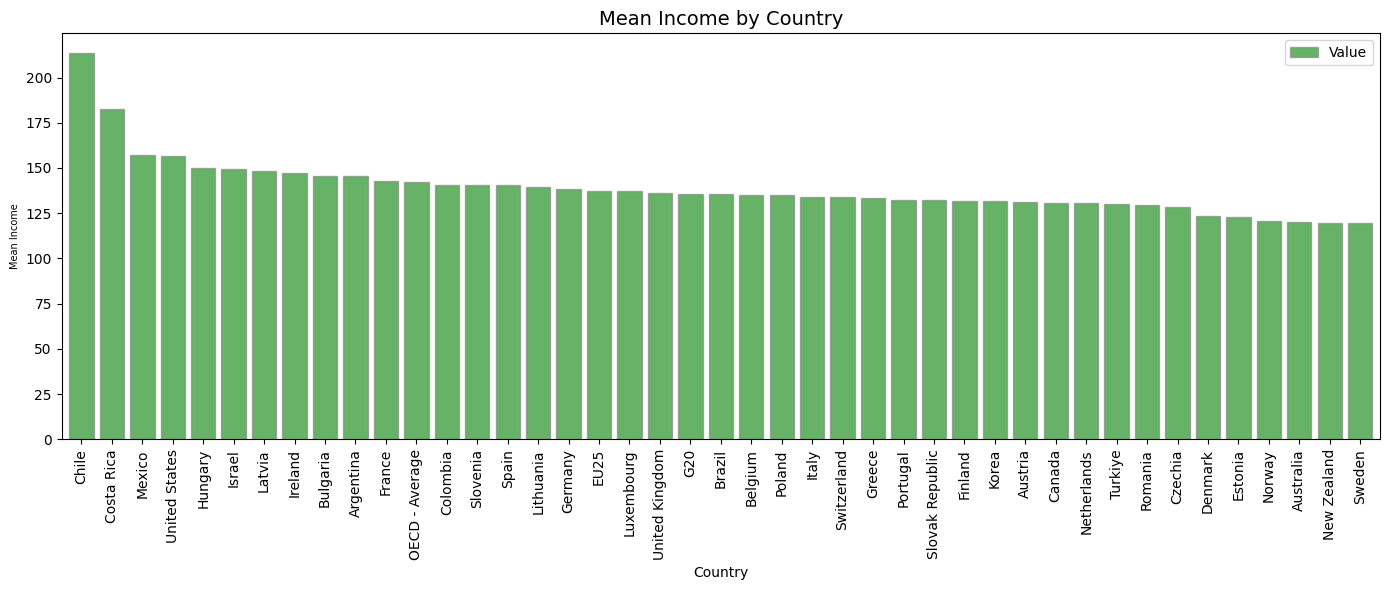

In [161]:
ax = country_income_median.plot.bar(x='Country', y='Value', rot=90, width=0.8, ec='grey', alpha=0.6, color='blue', figsize=(14, 6))

ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Median Income', fontsize=7)
ax.set_title('Median Income by Country', fontsize=14)

plt.tight_layout()
plt.show()


ax = country_income_mean.plot.bar(x='Country', y='Value', rot=90, width=0.8, ec='grey', alpha=0.6, color='green', figsize=(14, 6))


ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Mean Income', fontsize=7)
ax.set_title('Mean Income by Country', fontsize=14)


plt.tight_layout()
plt.show()

<div style="background-color:#ADD8E6;">
The results are very interesting: the data show that Chile, Costa Rica and the United States consistently rank high in terms of median and mean income, which suggests relatively high incomes for the different indicators. Countries such as European countries and Australia, which are considered traditionally high-income, did not rank as high as expected.

<div style="background-color:#F2FBEF;">
<p>A comparison of the 10 countries with the highest and lowest median salaries, and the 10 countries with the highest and lowest average salaries, respectively, provides an idea of the level of inter-country pay differentials.</p>  
</div>

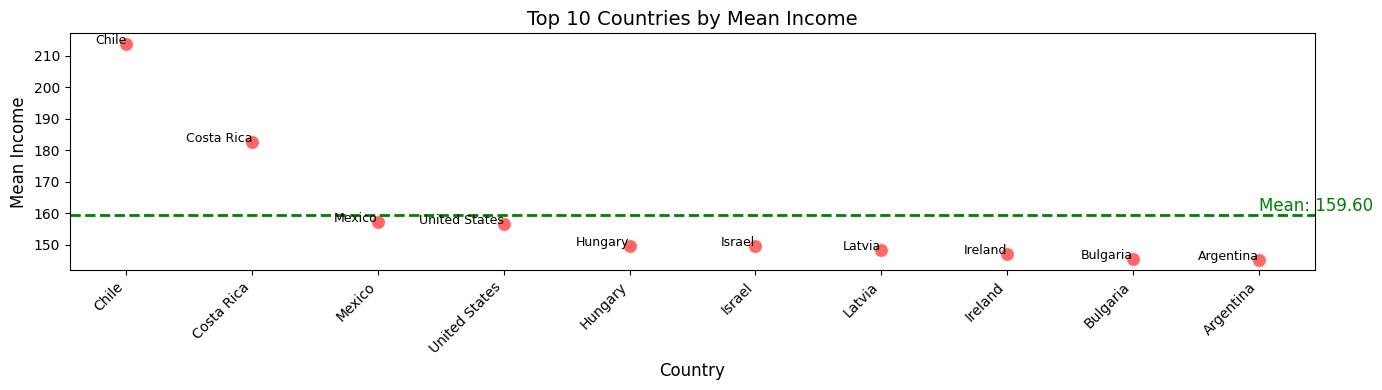

/tmp/ipython-input-162-1374979818.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bottom_10_mean = data_ed.groupby('Country')['Value'].mean().sort_values(ascending=True).reset_index().head(10)


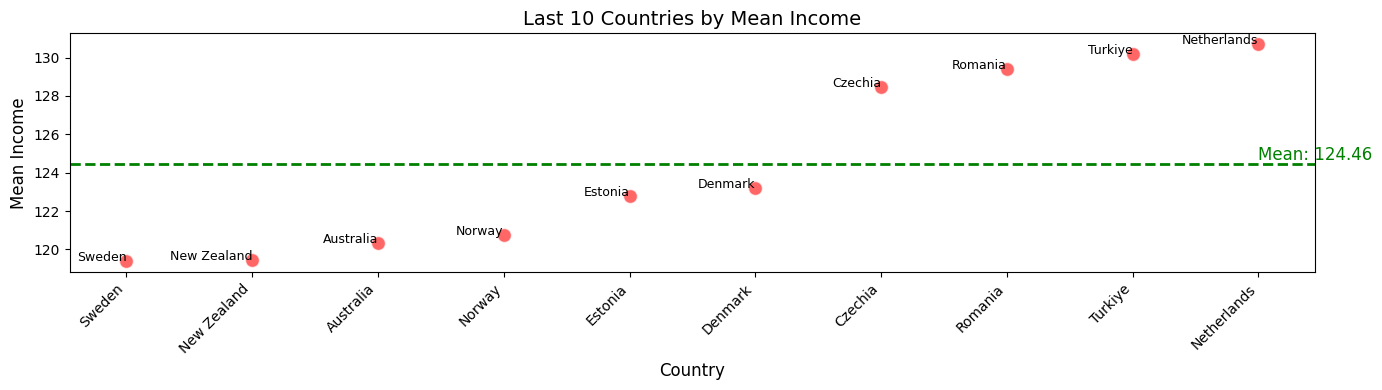

In [162]:
top10_mean =country_income_mean.head(10)

plt.figure(figsize=(14, 4))
plt.scatter(top10_mean['Country'], top10_mean['Value'], color='red', alpha=0.6, edgecolor='w', s=100)

for x in range(len(top10_mean)):
    plt.text(top10_mean['Country'][x], top10_mean['Value'][x], top10_mean['Country'][x], fontsize=9, ha='right')

mean_top10_mean_value = top10_mean['Value'].mean()
plt.axhline(mean_top10_mean_value, color='green', linestyle='--', linewidth=2)
plt.text(len(top10_mean['Country']) - 1, mean_top10_mean_value, f'Mean: {mean_top10_mean_value:.2f}', color='green', fontsize=12, va='bottom')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.title('Top 10 Countries by Mean Income', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

bottom_10_mean = data_ed.groupby('Country')['Value'].mean().sort_values(ascending=True).reset_index().head(10)
plt.figure(figsize=(14, 4))
plt.scatter(bottom_10_mean['Country'], bottom_10_mean['Value'], color='red', alpha=0.6, edgecolor='w', s=100)

for y in range(len(bottom_10_mean)):
    plt.text(bottom_10_mean['Country'][y], bottom_10_mean['Value'][y], bottom_10_mean['Country'][y], fontsize=9, ha='right')

mean_bottom_10_mean = bottom_10_mean['Value'].mean()
plt.axhline(mean_bottom_10_mean, color='green', linestyle='--', linewidth=2)
plt.text(len(bottom_10_mean['Country']) - 1, mean_bottom_10_mean, f'Mean: {mean_bottom_10_mean:.2f}', color='green', fontsize=12, va='bottom')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.title('Last 10 Countries by Mean Income', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



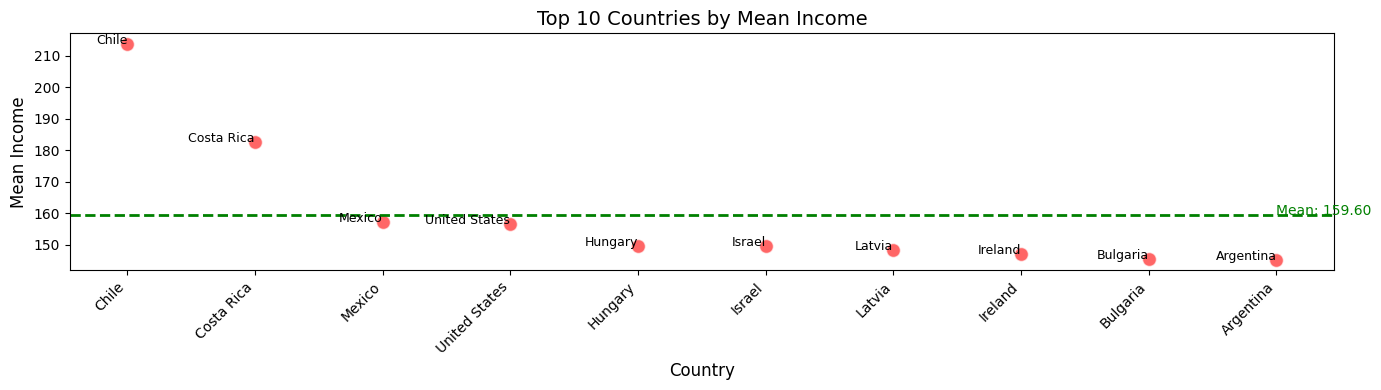

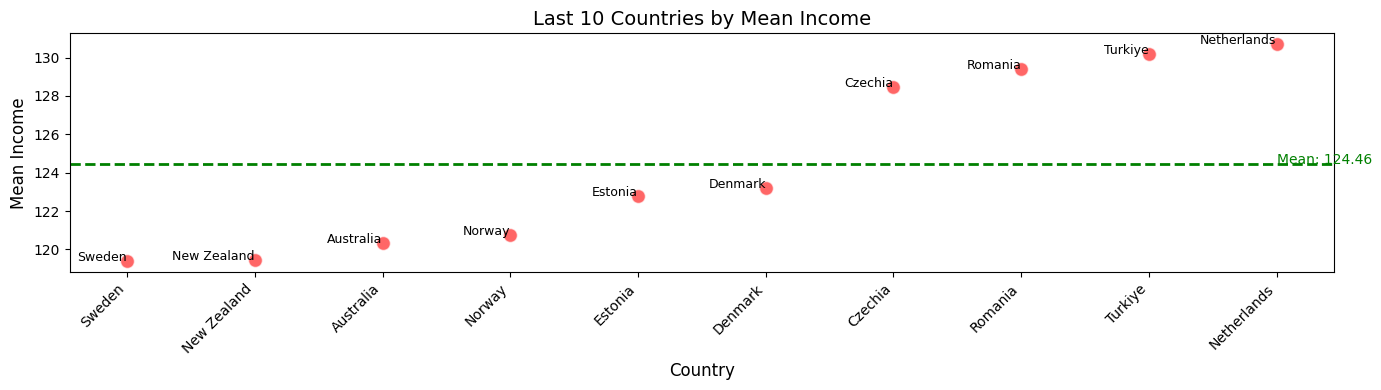

In [176]:
top10_mean = country_income_mean.head(10)

plt.figure(figsize=(14, 4))
plt.scatter(top10_mean['Country'], top10_mean['Value'], color='red', alpha=0.6, edgecolor='w', s=100)
for x in range(len(top10_mean)):
    plt.text(top10_mean['Country'][x], top10_mean['Value'][x], top10_mean['Country'][x], fontsize=9, ha='right')

mean_top10_mean_value = top10_mean['Value'].mean()
plt.axhline(mean_top10_mean_value, color='green', linestyle='--', linewidth=2)
plt.text(len(top10_mean['Country']) - 1, mean_top10_mean_value, f'Mean: {mean_top10_mean_value:.2f}', color='green')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.title('Top 10 Countries by Mean Income', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ottom_10_mean = data_ed.groupby('Country', observed=False)['Value'].mean().sort_values(ascending=True).reset_index().head(10)

plt.figure(figsize=(14, 4))
plt.scatter(bottom_10_mean['Country'], bottom_10_mean['Value'], color='red', alpha=0.6, edgecolor='w', s=100)
for y in range(len(bottom_10_mean)):
    plt.text(bottom_10_mean['Country'][y], bottom_10_mean['Value'][y], bottom_10_mean['Country'][y], fontsize=9, ha='right')

mean_bottom_10_mean = bottom_10_mean['Value'].mean()
plt.axhline(mean_bottom_10_mean, color='green', linestyle='--', linewidth=2)
plt.text(len(bottom_10_mean['Country']) - 1, mean_bottom_10_mean, f'Mean: {mean_bottom_10_mean:.2f}', color='green')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.title('Last 10 Countries by Mean Income', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div style="background-color:#ADD8E6;">The image shows the distribution of income in different countries. Significant differences appear in the 10 countries with the highest incomes and the 10 countries with the lowest incomes.

<div style="background-color:#F2FBEF;">
<p>Quickly compare median and mean salaries in different regions.</p>
</div>

In [164]:
region_income_median = data_ed.groupby('Region')['Value'].median().sort_values(ascending=False).reset_index()
region_income_mean = data_ed.groupby('Region')['Value'].mean().sort_values(ascending=False).reset_index()
print(region_income_median)
print(region_income_mean)

            Region      Value
0      Middle East  157.57885
1  Central America  156.22485
2    North America  139.11370
3           Europe  135.88390
4             Asia  135.88390
5    South America  135.88390
6          Oceania  119.42250
            Region       Value
0  Central America  182.707890
1    South America  159.868896
2      Middle East  149.612480
3    North America  147.407004
4           Europe  134.838037
5             Asia  130.975713
6          Oceania  119.874237


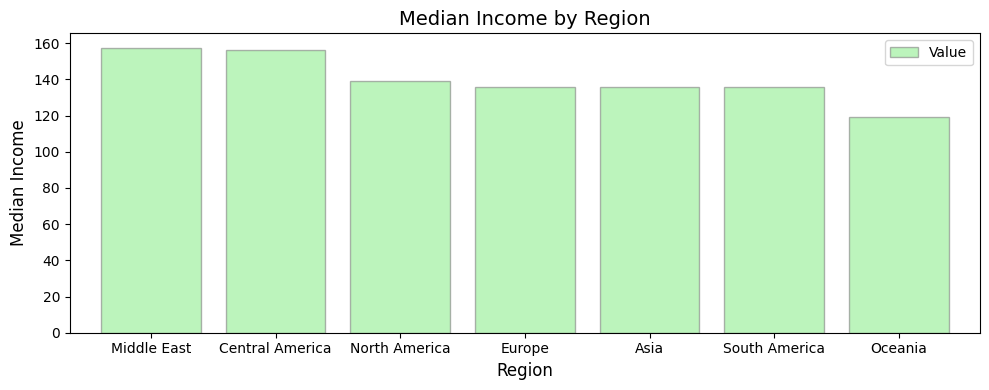

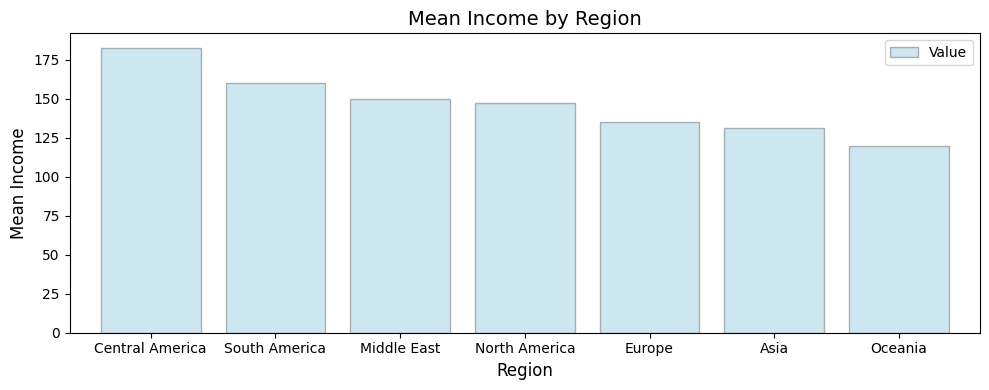

In [165]:
ax = region_income_median.plot.bar(x='Region', y='Value', rot=0, width=0.8, ec='grey', alpha=0.6, color='lightgreen', figsize=(10, 4))

ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Median Income', fontsize=12)
ax.set_title('Median Income by Region', fontsize=14)

plt.tight_layout()
plt.show()


ax = region_income_mean.plot.bar(x='Region', y='Value', rot=0, width=0.8, ec='grey', alpha=0.6, color='lightblue', figsize=(10, 4))

ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Mean Income', fontsize=12)
ax.set_title('Mean Income by Region', fontsize=14)

plt.tight_layout()
plt.show()

<div style="background-color:#ADD8E6;">
The results of the analysis and the charts explain the imbalance in regional incomes with the Middle East and the Americas having the highest incomes and Oceania having the lowest. It is noteworthy that South America ranks low in median salaries but high in tie values, indicating that most salaries in South America are concentrated in regions below the median, but the mean is pulled up by very high values.

<div style="background-color:#F2FBEF;">
<p>Compare income differences by eudcation level(Full-time/Part-time).</p>
    
<p>The ordering of salary income is consistent across education levels, regardless of whether the income is full-time or part-time.</p>   
</div>

In [166]:
print(data_ed.columns)

Index(['Country', 'Education', 'Gender', 'Age', 'Category', 'Year', 'Value',
       'Region'],
      dtype='object')


In [169]:
print(data_ed.columns.tolist())

['Country', 'Education', 'Gender', 'Age', 'Category', 'Year', 'Value', 'Region']


In [171]:
ull_time_data = data_ed[data_ed['Category'] == 'Full-time']
edu_full = full_time_data.groupby('Education', observed=False)['Value'] \
    .agg(['mean', 'median']) \
    .sort_values(by=['mean', 'median'], ascending=False) \
    .reset_index()

part_time_data = data_ed[data_ed['Category'] == 'Part-time']
edu_part = part_time_data.groupby('Education', observed=False)['Value'] \
    .agg(['mean', 'median']) \
    .sort_values(by=['mean', 'median'], ascending=False) \
    .reset_index()

print(edu_full)
print(edu_part)

            Education        mean    median
0   Master and  Above  176.926381  161.1762
1  Bachelor and Above  158.443337  150.6336
2            Tertiary  156.039466  149.0766
3            Bachelor  143.734362  135.8839
4      Short-tertiary  125.601706  129.8900
5        Non-Tertiary  105.718799  102.4057
            Education        mean     median
0   Master and  Above  184.320166  169.44070
1  Bachelor and Above  163.701010  156.71260
2            Tertiary  160.980307  154.97770
3            Bachelor  147.848592  138.45450
4      Short-tertiary  127.320436  134.69590
5        Non-Tertiary  104.045697  103.04565


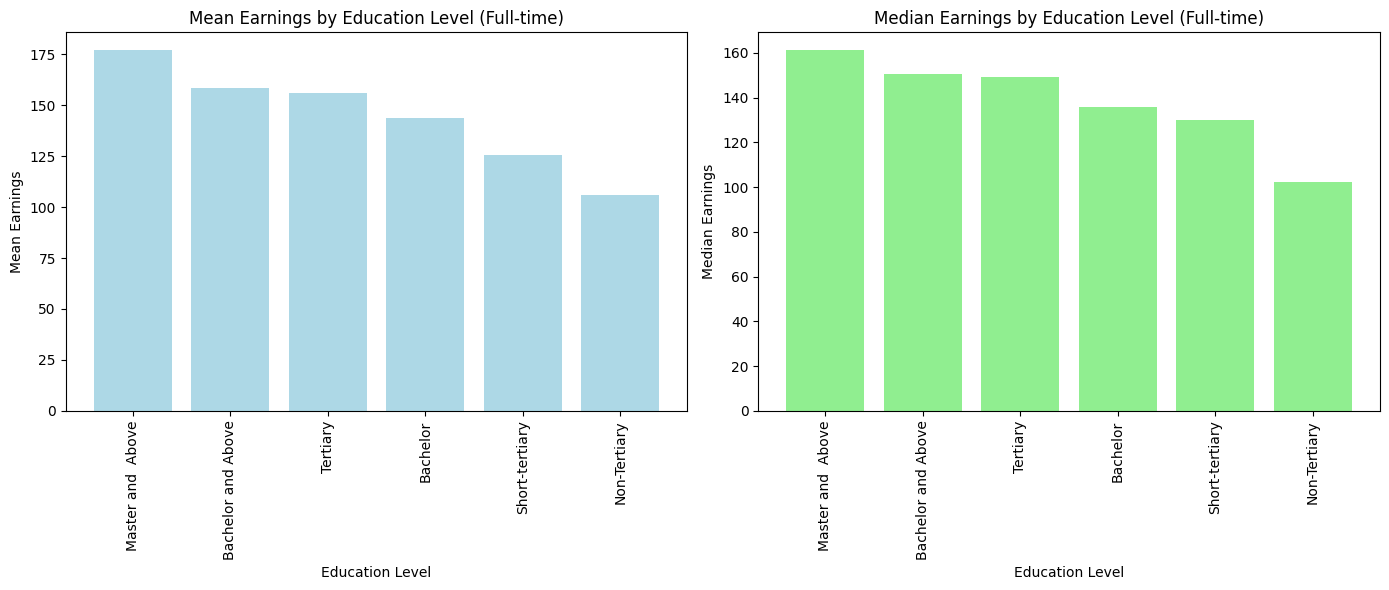

In [172]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.bar(edu_full['Education'], edu_full['mean'], color='lightblue')
plt.title('Mean Earnings by Education Level (Full-time)')
plt.xlabel('Education Level')
plt.ylabel('Mean Earnings')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(edu_full['Education'], edu_full['median'], color='lightgreen')
plt.title('Median Earnings by Education Level (Full-time)')
plt.xlabel('Education Level')
plt.ylabel('Median Earnings')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


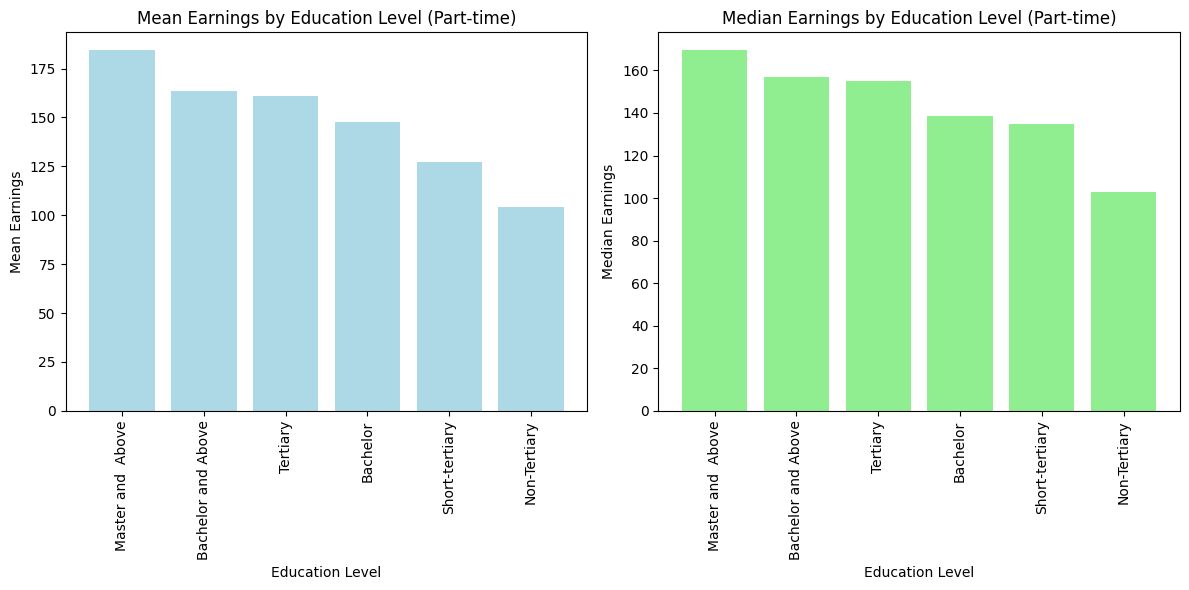

In [173]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(edu_part['Education'], edu_part['mean'], color='lightblue')
plt.title('Mean Earnings by Education Level (Part-time)')
plt.xlabel('Education Level')
plt.ylabel('Mean Earnings')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(edu_part['Education'], edu_part['median'], color='lightgreen')
plt.title('Median Earnings by Education Level (Part-time)')
plt.xlabel('Education Level')
plt.ylabel('Median Earnings')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<div style="background-color:#ADD8E6;">
The results of the analysis and the bar charts show that the higher the level of education, the higher the income in the relationship between educational attainment and income, regardless of whether the person works full-time or part-time. The income gap between different levels of education remains significant, with higher education (master's degree and above) yielding the highest incomes. Earnings are lowest for non-tertiary education, which emphasizes the economic value of access to tertiary education.

<div style="background-color:#F2FBEF;">
<p>Further compare median and average wages for the same level of education in different countries.</p>
    
<p>Attempts are made to understand the differences in earnings in different countries for the same level of education.</p>   
</div>

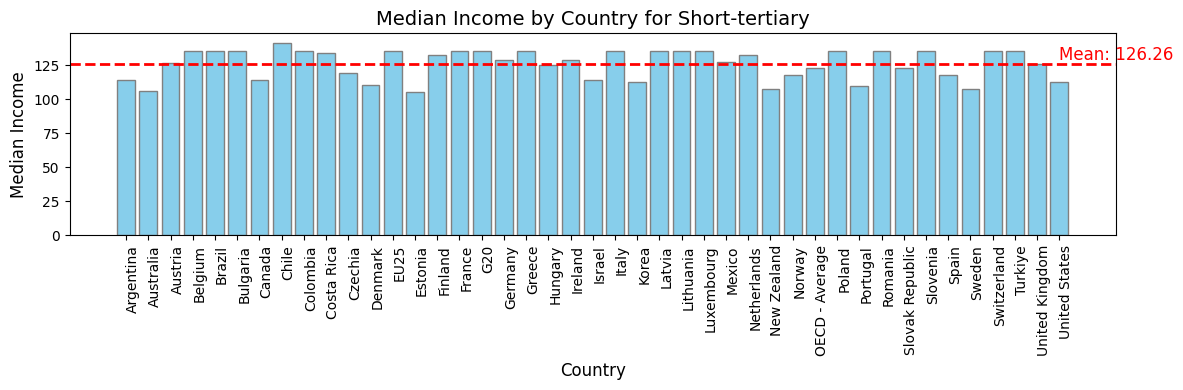

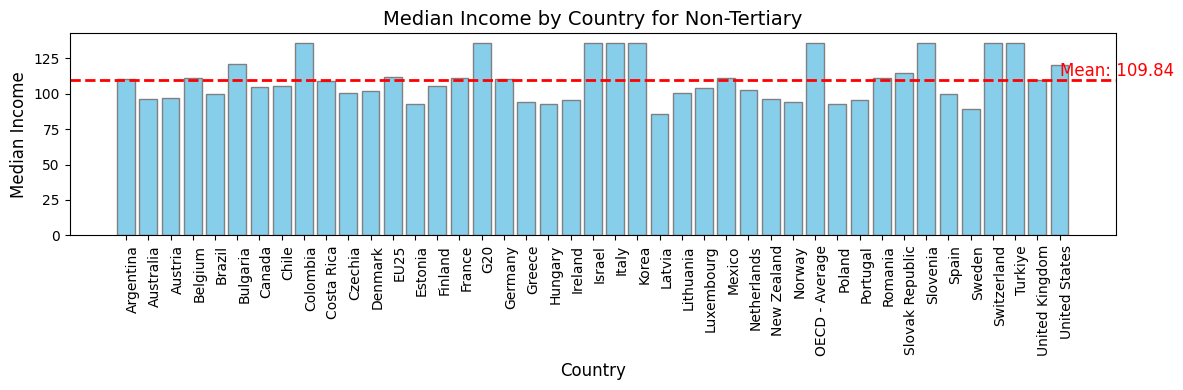

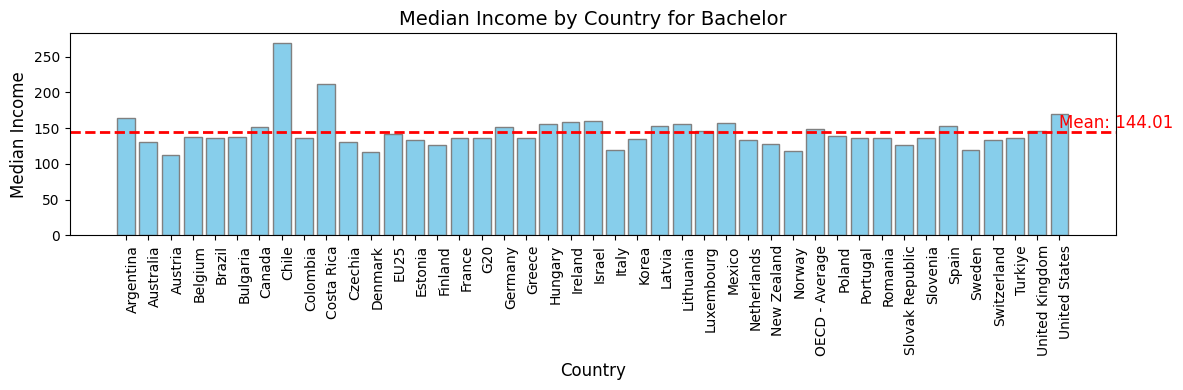

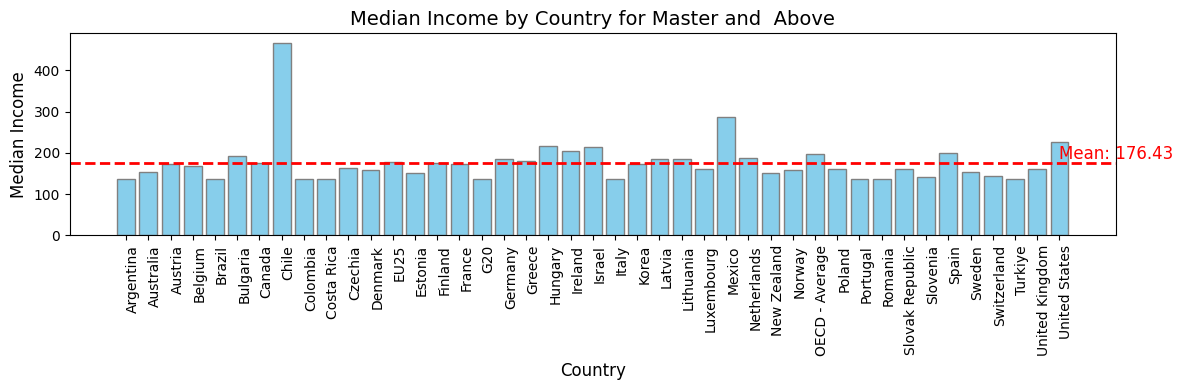

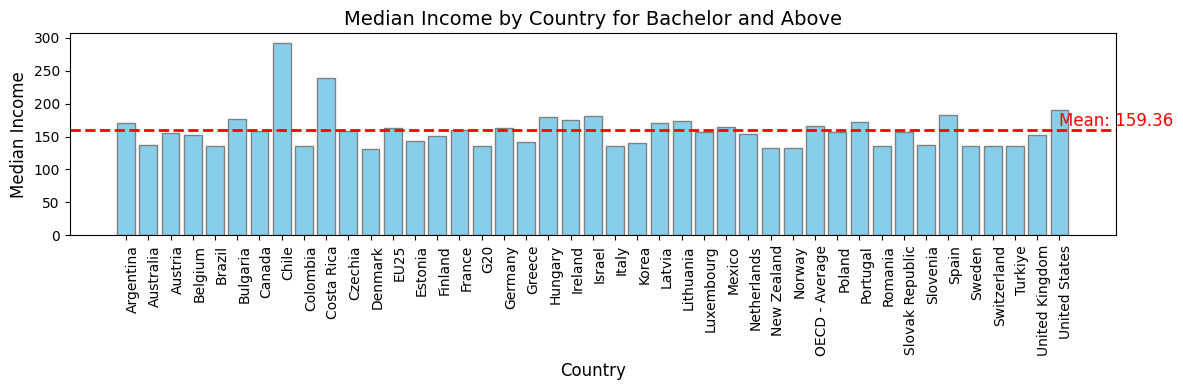

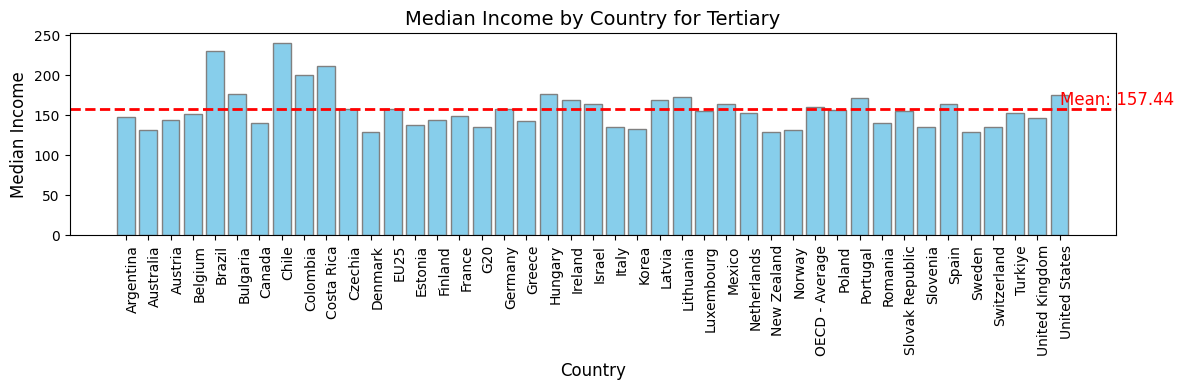

In [177]:
education_data = data_ed['Education'].unique()

for x in education_data:
    education_country = data_ed[data_ed['Education'] == x]

    country_median = education_country.groupby('Country', observed=False)['Value'].median().reset_index()

    plt.figure(figsize=(12, 4))
    plt.bar(country_median['Country'], country_median['Value'], color='skyblue', edgecolor='grey')

    median_mean_country = country_median['Value'].mean()
    plt.axhline(median_mean_country, color='red', linestyle='--', linewidth=2)
    plt.text(len(country_median['Country']) - 1, median_mean_country, f'Mean: {median_mean_country:.2f}', color='red', fontsize=12, va='bottom')

    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Median Income', fontsize=12)
    plt.title(f'Median Income by Country for {x}', fontsize=14)
    plt.xticks(rotation=90, ha='left')
    plt.tight_layout()
    plt.show()

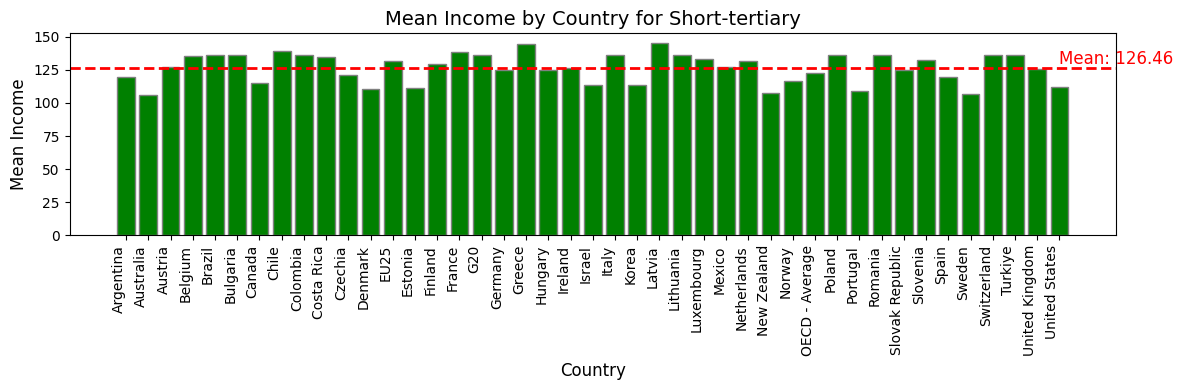

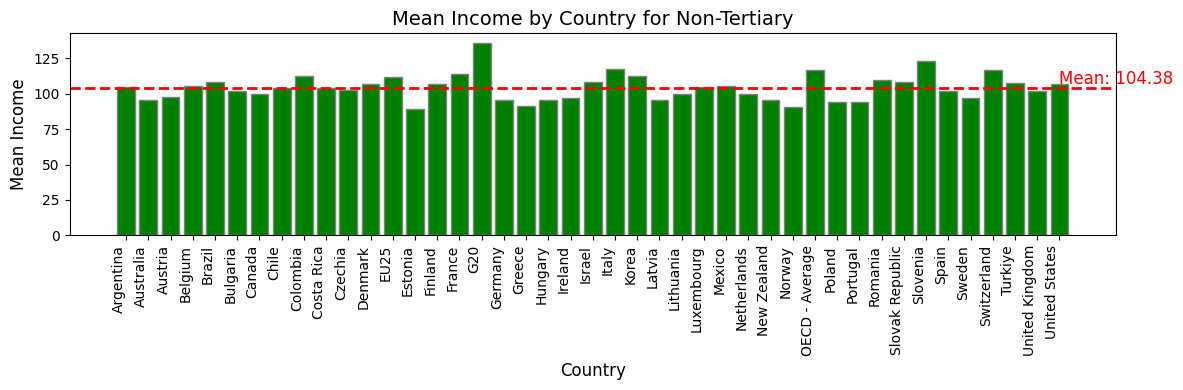

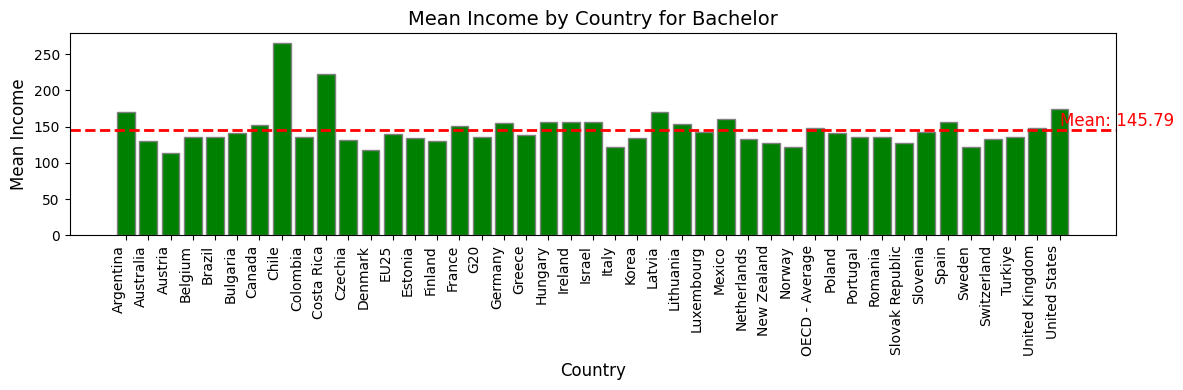

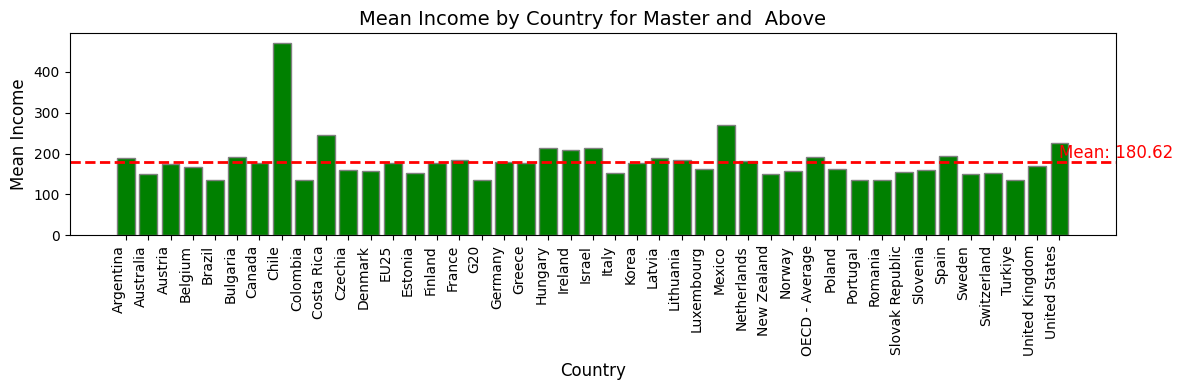

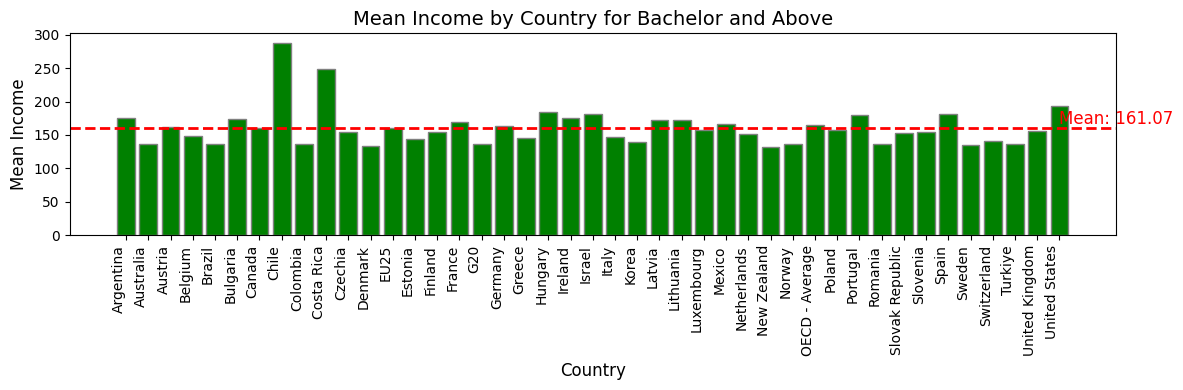

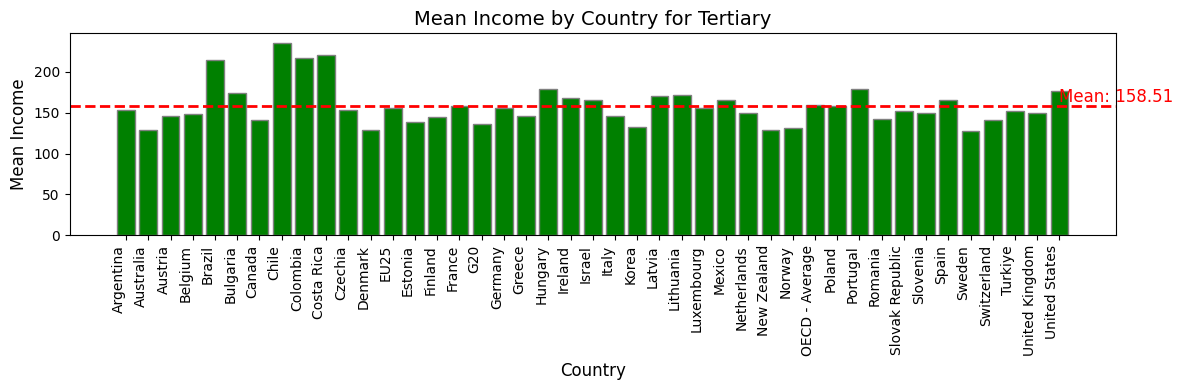

In [178]:
for x in education_data:
    education_country = data_ed[data_ed['Education'] == x]

    country_mean = education_country.groupby('Country', observed=True)['Value'].mean().reset_index()

    plt.figure(figsize=(12, 4))
    plt.bar(country_mean['Country'], country_mean['Value'], color= 'green', edgecolor='grey')


    mean_mean_country = country_mean['Value'].mean()
    plt.axhline(mean_mean_country, color='red', linestyle='--', linewidth=2)
    plt.text(len(country_mean['Country']) - 1, mean_mean_country, f'Mean: {mean_mean_country:.2f}', color='red', fontsize=12, va='bottom')

    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Mean Income', fontsize=12)
    plt.title(f'Mean Income by Country for {x}', fontsize=14)
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

<div style="background-color:#ADD8E6;">
The higher the level of education, the higher the country's median and mean income.There are significant differences in median incomes per education level across countries, indicating that the economic benefits of education vary globally.Thus, it reflects the difference between economic development and the development of education levels.The red dotted line (average median income) provides a benchmark for comparing incomes across countries at different levels of education.


<div style="background-color:#F2FBEF;">
<p>Defines salaries for the 24-34 age group as starting salaries, and provides an overview of the comparison of the median starting salary with the national median salary and the comparison of the average starting salary with the national average salary. Sorted in descending order of starting salary.</p>
    
</div>

In [179]:
age_25_group = data_ed[data_ed['Age'] == '25-34 years']

country_starting_median = age_25_group.groupby('Country')['Value'].median().reset_index()
country_starting_mean = age_25_group.groupby('Country')['Value'].mean().reset_index()

country_starting_median.columns = ['Country', 'Median Starting Salary']
country_starting_mean.columns = ['Country', 'Mean Starting Salary']



country_income_median.columns = ['Country', 'Median Salary']
country_income_mean.columns = ['Country', 'Mean Salary']

median_country_starting = pd.merge(country_income_median, country_starting_median, on='Country').sort_values(by='Median Starting Salary', ascending=False)
mean_country_starting = pd.merge(country_income_mean, country_starting_mean, on='Country').sort_values(by='Mean Starting Salary', ascending=False)

print(median_country_starting)
print(mean_country_starting)


            Country  Median Salary  Median Starting Salary
1     United States      166.99820               165.70535
0             Chile      172.07275               162.78025
2            Israel      157.57885               162.01445
6           Ireland      144.77190               150.63570
5           Hungary      150.99035               142.15140
7    United Kingdom      142.52665               141.29430
21        Lithuania      135.88390               141.00290
4            Latvia      153.21760               138.81310
10            Spain      137.22200               137.22200
8            Mexico      139.60795               136.88480
3        Costa Rica      156.22485               135.88390
30         Portugal      135.88390               135.88390
11           Poland      136.18010               135.88390
13      Switzerland      135.88390               135.88390
12        Argentina      136.16975               135.88390
15           Brazil      135.88390               135.883

/tmp/ipython-input-179-2375455993.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_starting_median = age_25_group.groupby('Country')['Value'].median().reset_index()
/tmp/ipython-input-179-2375455993.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_starting_mean = age_25_group.groupby('Country')['Value'].mean().reset_index()


<div style="background-color:#ADD8E6;">
The United States, Chile, Israel Ireland, Hungary and the United Kingdom consistently rank among the highest in median and average starting salaries, indicating strong initial earnings for young professionals.

Comparative results show that countries with higher median and average overall salaries tend to offer higher starting salaries, highlighting the economic advantages of these regions for young professionals.

<div style="background-color:#F2FBEF;">
<p>Comparison of median salaries and median starting salaries across different regions, as well as average salaries and average starting salaries.</p>

<p>The Middle East and the Americas are the regions with the highest starting salaries, while Oceania is clearly the region with the lowest starting salaries.</p>
</div>

In [180]:
region_starting_median = age_25_group.groupby('Region')['Value'].median().reset_index()
region_starting_mean = age_25_group.groupby('Region')['Value'].mean().reset_index()

region_starting_median.columns = ['Region', 'Median Starting Salary']
region_starting_mean.columns = ['Region', 'Mean Starting Salary']


region_income_median.columns = ['Region', 'Median Salary']
region_income_mean.columns = ['Region', 'Mean Salary']

median_region_starting = pd.merge(region_income_median, region_starting_median, on='Region').sort_values(by='Median Starting Salary', ascending=False)
mean_region_starting = pd.merge(region_income_mean, region_starting_mean, on='Region').sort_values(by='Mean Starting Salary', ascending=False)

print(median_region_starting)
print(mean_region_starting)

            Region  Median Salary  Median Starting Salary
0      Middle East      157.57885               162.01445
2    North America      139.11370               136.18885
1  Central America      156.22485               135.88390
4             Asia      135.88390               135.88390
5    South America      135.88390               135.88390
3           Europe      135.88390               135.44130
6          Oceania      119.42250               114.30675
            Region  Mean Salary  Mean Starting Salary
2      Middle East   149.612480            152.342419
0  Central America   182.707890            152.291941
1    South America   159.868896            146.058963
3    North America   147.407004            139.273335
4           Europe   134.838037            128.071731
5             Asia   130.975713            126.051215
6          Oceania   119.874237            112.323731


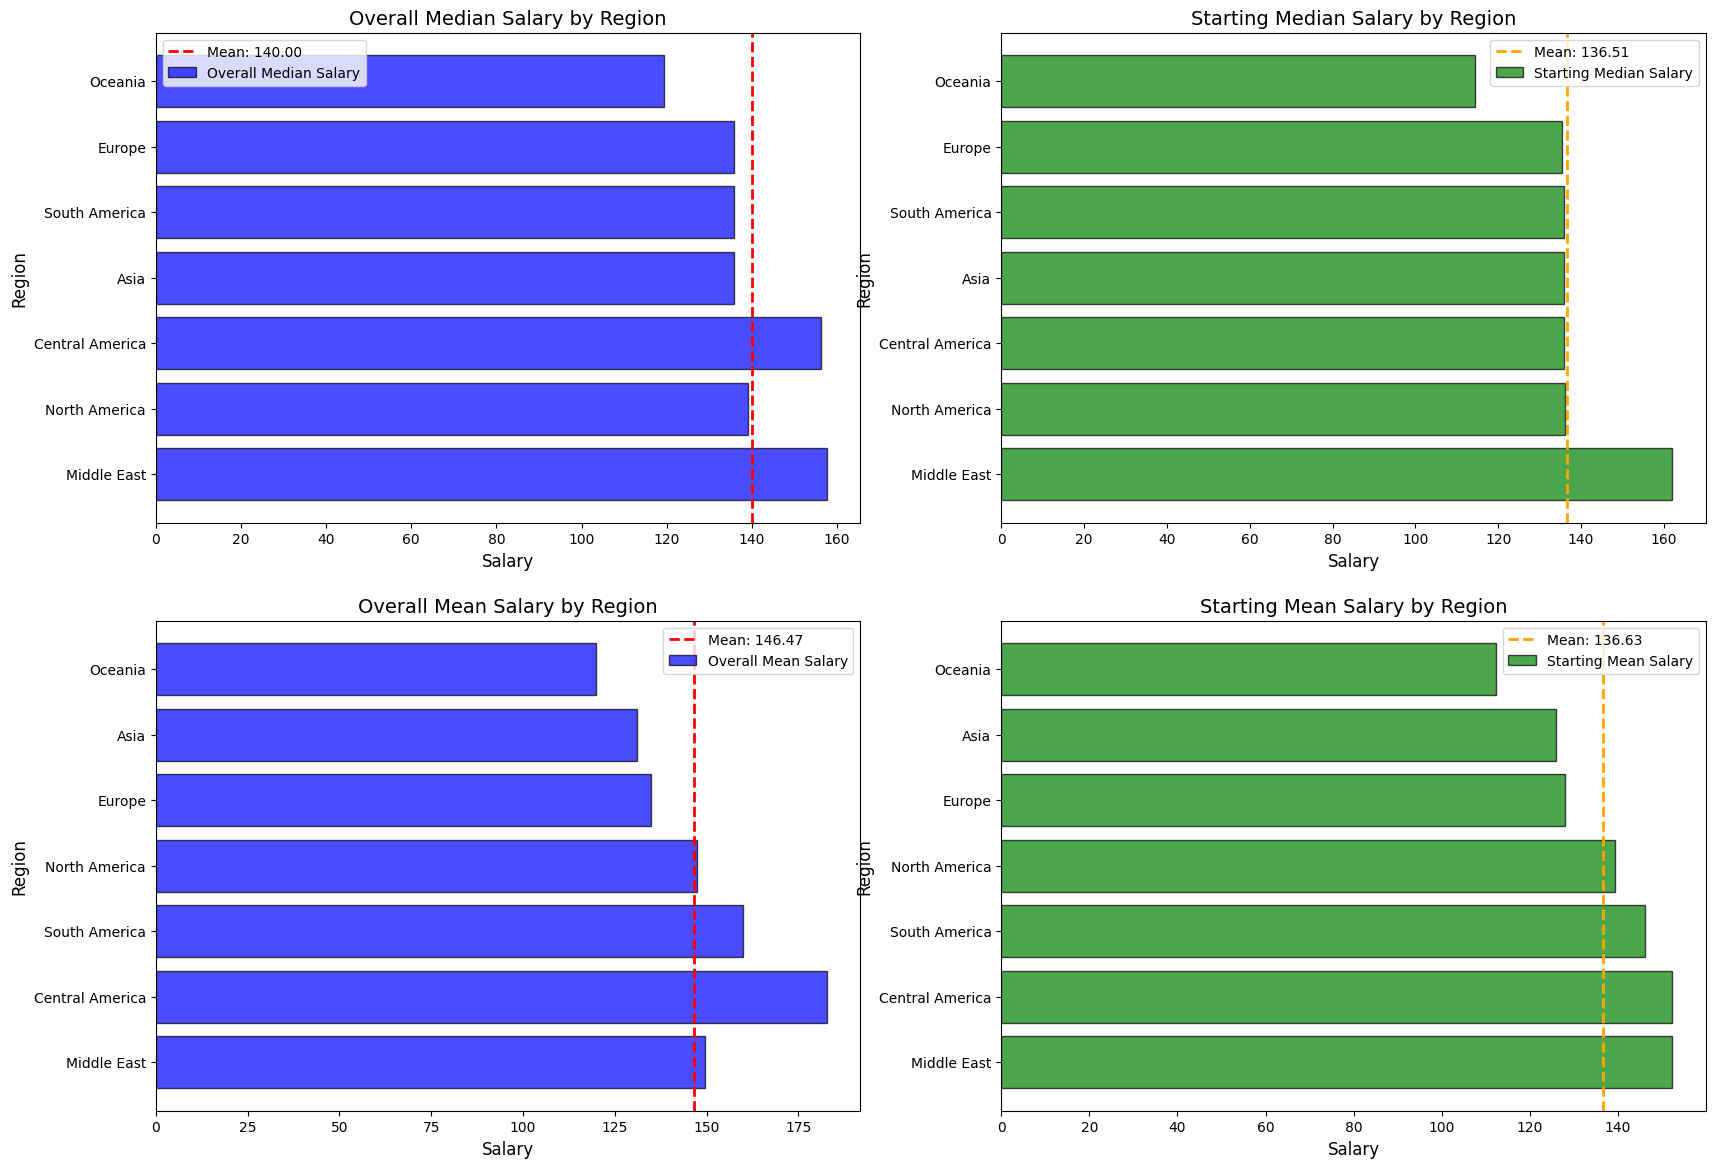

In [181]:
fig, axs = plt.subplots(2, 2, figsize=(20, 14))


axs[0, 0].barh(median_region_starting['Region'], median_region_starting['Median Salary'], color='blue', alpha=0.7, edgecolor='black', label='Overall Median Salary')
axs[0, 0].axvline(median_region_starting['Median Salary'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {median_region_starting["Median Salary"].mean():.2f}')
axs[0, 0].set_xlabel('Salary', fontsize=12)
axs[0, 0].set_ylabel('Region', fontsize=12)
axs[0, 0].set_title('Overall Median Salary by Region', fontsize=14)
axs[0, 0].legend()


axs[0, 1].barh(median_region_starting['Region'], median_region_starting['Median Starting Salary'], color='green', alpha=0.7, edgecolor='black', label='Starting Median Salary')
axs[0, 1].axvline(median_region_starting['Median Starting Salary'].mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {median_region_starting["Median Starting Salary"].mean():.2f}')
axs[0, 1].set_xlabel('Salary', fontsize=12)
axs[0, 1].set_ylabel('Region', fontsize=12)
axs[0, 1].set_title('Starting Median Salary by Region', fontsize=14)
axs[0, 1].legend()


axs[1, 0].barh(mean_region_starting['Region'], mean_region_starting['Mean Salary'], color='blue', alpha=0.7, edgecolor='black', label='Overall Mean Salary')
axs[1, 0].axvline(mean_region_starting['Mean Salary'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_region_starting["Mean Salary"].mean():.2f}')
axs[1, 0].set_xlabel('Salary', fontsize=12)
axs[1, 0].set_ylabel('Region', fontsize=12)
axs[1, 0].set_title('Overall Mean Salary by Region', fontsize=14)
axs[1, 0].legend()


axs[1, 1].barh(mean_region_starting['Region'], mean_region_starting['Mean Starting Salary'], color='green', alpha=0.7, edgecolor='black', label='Starting Mean Salary')
axs[1, 1].axvline(mean_region_starting['Mean Starting Salary'].mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_region_starting["Mean Starting Salary"].mean():.2f}')
axs[1, 1].set_xlabel('Salary', fontsize=12)
axs[1, 1].set_ylabel('Region', fontsize=12)
axs[1, 1].set_title('Starting Mean Salary by Region', fontsize=14)
axs[1, 1].legend()

<div style="background-color:#ADD8E6;">
Starting salaries in the Middle East are consistently the highest, both in terms of median and average.
Starting salaries in Central and South America are also high, indicating high entry-level earnings in these regions.
North America has competitive starting salaries, reflecting its high initial earnings.
Oceania has the lowest starting salaries, indicating lower entry-level earnings for young people in this region.
These comparisons highlight regional differences in starting salaries and emphasize the economic opportunities available to young professionals in different regions.

<div style="background-color:#F2FBEF;">
<p>Comparison of median salaries, median starting salaries, average salaries, and average starting salaries across different education levels.</p>
</div>

In [185]:
edu_starting_median = age_25_group.groupby('Education', observed=True)['Value'].median().reset_index()
edu_starting_mean   = age_25_group.groupby('Education', observed=True)['Value'].mean().reset_index()

edu_starting_median.columns = ['Education', 'Median Starting Salary']
edu_starting_mean.columns = ['Education', 'Mean Starting Salary']


edu_income_median = data_ed.groupby('Education', observed=True)['Value'].median().reset_index()
edu_income_mean   = data_ed.groupby('Education', observed=True)['Value'].mean().reset_index()

edu_income_median.columns = ['Education', 'Median Salary']
edu_income_mean.columns = ['Education', 'Mean Salary']

median_edu_starting = pd.merge(edu_income_median, edu_starting_median, on='Education').sort_values(by='Median Starting Salary', ascending=False)
mean_edu_starting = pd.merge(edu_income_mean, edu_starting_mean, on='Education').sort_values(by='Mean Starting Salary', ascending=False)

print(median_edu_starting)
print(mean_edu_starting)

            Education  Median Salary  Median Starting Salary
2   Master and  Above      165.42055               148.11210
5            Tertiary      152.01640               138.85580
1  Bachelor and Above      154.10165               137.91310
0            Bachelor      135.96755               135.88390
4      Short-tertiary      131.12090               127.01340
3        Non-Tertiary      102.56675               102.82605
            Education  Mean Salary  Mean Starting Salary
2   Master and  Above   180.623273            159.850795
1  Bachelor and Above   161.072173            146.297644
5            Tertiary   158.509887            144.574819
0            Bachelor   145.791477            137.312405
4      Short-tertiary   126.461071            123.865242
3        Non-Tertiary   104.882248            107.081475


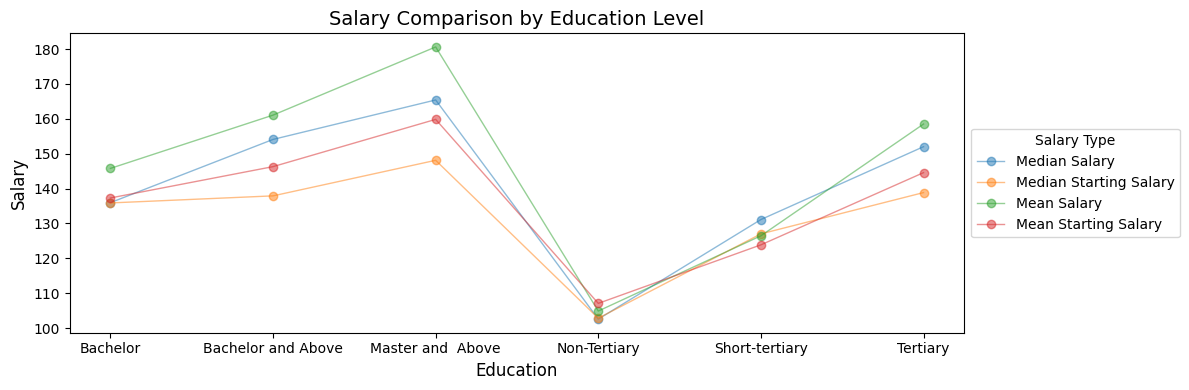

In [187]:
edu_value = pd.merge(median_edu_starting, mean_edu_starting, on='Education', how='outer')

edu_value.rename(columns={
    'Median Salary_x': 'Median Salary',
    'Median Starting Salary_x': 'Median Starting Salary',
    'Mean Salary_y': 'Mean Salary',
    'Mean Starting Salary_y': 'Mean Starting Salary'
}, inplace=True)

ax = edu_value.plot(x='Education',
                    y=['Median Salary', 'Median Starting Salary', 'Mean Salary', 'Mean Starting Salary'],
                    figsize=(12, 4),
                    lw=1,
                    alpha=0.5,
                    marker='o')

ax.set_title("Salary Comparison by Education Level", fontsize=14)
ax.set_xlabel('Education', fontsize=12)
ax.set_ylabel('Salary', fontsize=12)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Salary Type')

plt.tight_layout()
plt.show()

<div style="background-color:#ADD8E6;">
Higher levels of education are associated with higher overall and starting salaries.
Higher levels of education are associated with significantly higher median and mean starting salaries.
Comparative results highlight the significant impact of education on earning potential, with advanced degrees delivering the highest economic returns

<div style="background-color:#F2FBEF;">
<p>Comparison of median and average salaries between males and females with the same education level.</p>

<p>The results show that there is little or no difference in starting salaries between genders with the same level of education. All gaps appear to exist only between different levels of education.</p>
</div>

In [209]:
edu_income_median = data_ed.groupby('Education', observed=False)['Value'].median().reset_index()
edu_income_median.columns = ['Education', 'Median Salary']

edu_income_mean = data_ed.groupby('Education', observed=False)['Value'].mean().reset_index()
edu_income_mean.columns = ['Education', 'Mean Salary']

edu_male_median = data_ed[data_ed['Gender'] == 'M'].groupby('Education', observed=False)['Value'].median().reset_index()
edu_male_median.columns = ['Education', 'Male Median Salary']
edu_female_median = data_ed[data_ed['Gender'] == 'F'].groupby('Education',observed=False)['Value'].median().reset_index()
edu_female_median.columns = ['Education', 'Female Median Salary']
edu_Total_median = data_ed[data_ed['Gender'] == 'T'].groupby('Education', observed=False)['Value'].median().reset_index()
edu_Total_median.columns = ['Education', 'Total Median Salary']



edu_male_mean = data_ed[data_ed['Gender'] == 'M'].groupby('Education', observed=False)['Value'].mean().reset_index()
edu_male_mean.columns = ['Education', 'Male Mean Salary']
edu_female_mean = data_ed[data_ed['Gender'] == 'F'].groupby('Education', observed=False)['Value'].mean().reset_index()
edu_female_mean.columns = ['Education', 'Female Mean Salary']
edu_Total_mean = data_ed[data_ed['Gender'] == 'T'].groupby('Education', observed=False)['Value'].mean().reset_index()
edu_Total_mean.columns = ['Education', 'Total Mean Salary']

gender_edu_median = pd.merge(edu_income_median, edu_male_median, on='Education')
gender_edu_median = pd.merge(gender_edu_median, edu_female_median, on='Education')
gender_edu_median = pd.merge(gender_edu_median, edu_Total_median, on='Education')

gender_edu_mean = pd.merge(edu_income_mean, edu_male_mean, on='Education')
gender_edu_mean = pd.merge(gender_edu_mean, edu_female_mean, on='Education')
gender_edu_mean = pd.merge(gender_edu_mean, edu_Total_mean, on='Education')

print(gender_edu_median)
print(gender_edu_mean)

            Education  Median Salary  Male Median Salary  \
0            Bachelor      135.96755           136.19950   
1  Bachelor and Above      154.10165           154.81715   
2   Master and  Above      165.42055           165.14765   
3        Non-Tertiary      102.56675           102.36090   
4      Short-tertiary      131.12090           131.99290   
5            Tertiary      152.01640           153.52220   

   Female Median Salary  Total Median Salary  
0             138.05490            135.88390  
1             154.83730            153.28715  
2             165.81360            165.87580  
3             105.29940            101.46775  
4             135.01400            127.26680  
5             151.95475            151.08995  
            Education  Mean Salary  Male Mean Salary  Female Mean Salary  \
0            Bachelor   145.791477        145.106574          149.056204   
1  Bachelor and Above   161.072173        162.123036          162.827165   
2   Master and  Above 

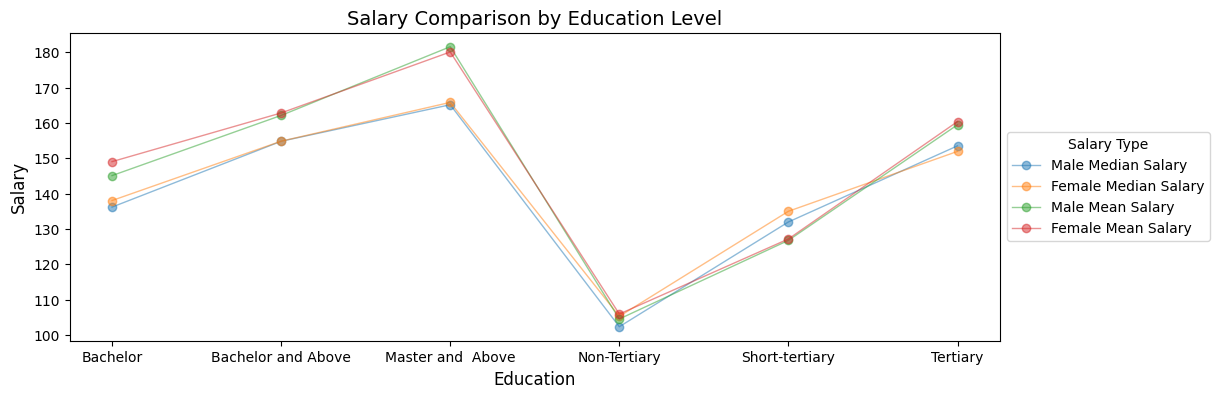

In [189]:
edu_gender_value = pd.merge(gender_edu_median, gender_edu_mean, on='Education', how='outer')

ax = edu_gender_value.plot(x='Education',
                        y=['Male Median Salary', 'Female Median Salary', 'Male Mean Salary', 'Female Mean Salary'],
                        figsize=(12, 4),
                        lw=1,
                        alpha=0.5,
                        marker='o')


ax.set_title("Salary Comparison by Education Level", fontsize=14)
ax.set_xlabel('Education', fontsize=12)
ax.set_ylabel('Salary', fontsize=12)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Salary Type')

plt.show()

<div style="background-color:#ADD8E6;">
In all genders, the higher the level of education, the higher the median and average salary.
The salaries of men and women are fairly consistent, reflecting good gender income equality in the dataset.
The median and average of total salaries are very close to the median and average of each gender.
The salaries of those without higher education are the lowest, emphasizing the economic benefits of receiving higher education once again.

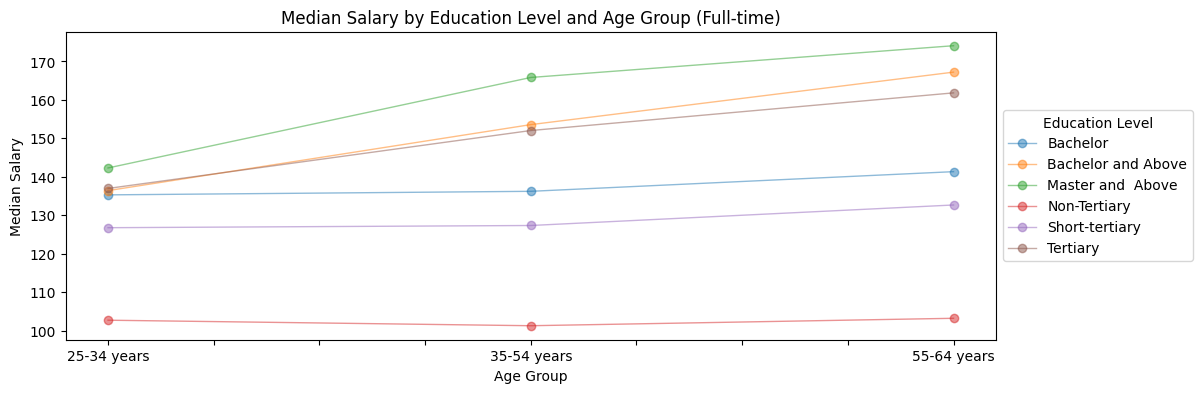

In [194]:
age_edu_median = full_time_data.pivot_table('Value', index='Age', columns='Education',aggfunc='median',observed=False )

ax = age_edu_median .plot(figsize=(12, 4),
                            lw=1,
                            alpha=0.5,
                            marker='o',
                            title='Median Salary by Education Level and Age Group (Full-time)')


ax.set_title("Median Salary by Education Level and Age Group (Full-time)")
ax.set_ylabel('Median Salary')
ax.set_xlabel('Age Group')

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Education Level')

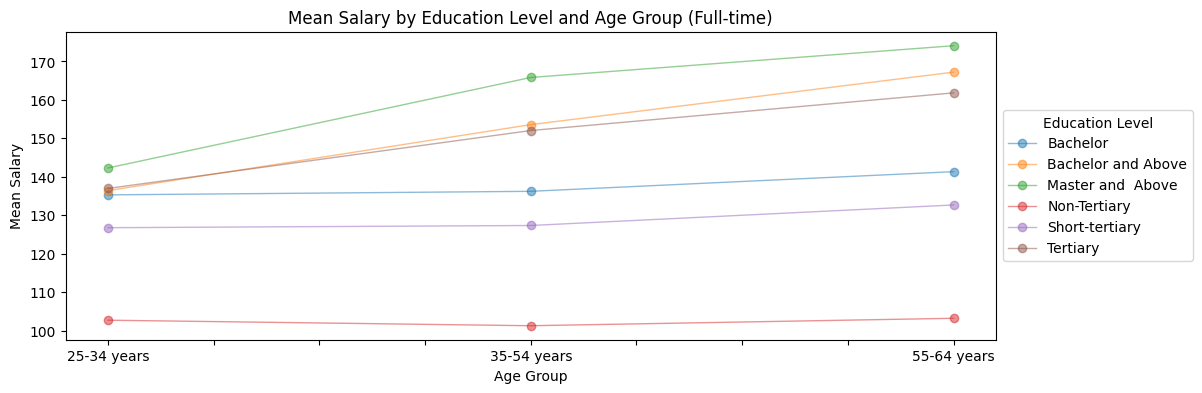

In [196]:
age_edu_mean = full_time_data.pivot_table('Value', index='Age', columns='Education', aggfunc='mean', observed=False )

ax = age_edu_median .plot(figsize=(12, 4),
                            lw=1,
                            alpha=0.5,
                            marker='o',
                            title='Mean Salary by Education Level and Age Group (Full-time)')


ax.set_title("Mean Salary by Education Level and Age Group (Full-time)")
ax.set_ylabel('Mean Salary')
ax.set_xlabel('Age Group')

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Education Level')

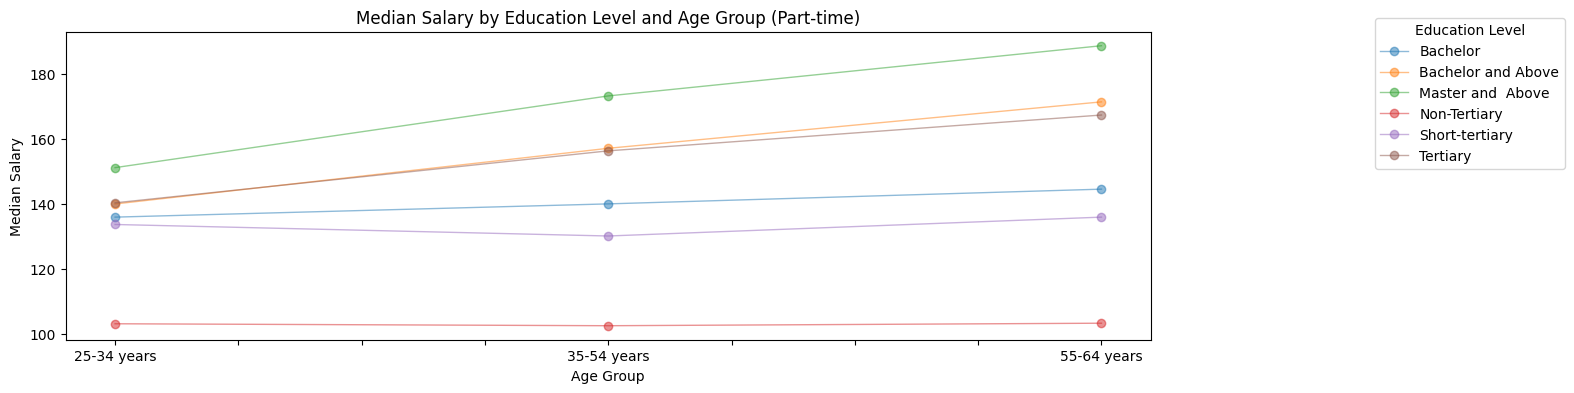

In [198]:
age_edu_median = part_time_data.pivot_table('Value', index='Age', columns='Education', aggfunc='median', observed=False )

ax = age_edu_median .plot(figsize=(14, 4),
                            lw=1,
                            alpha=0.5,
                            marker='o',
                            title='Median Salary by Education Level and Age Group (Part-time)')


ax.set_title("Median Salary by Education Level and Age Group (Part-time)")
ax.set_ylabel('Median Salary')
ax.set_xlabel('Age Group')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.8), title='Education Level')

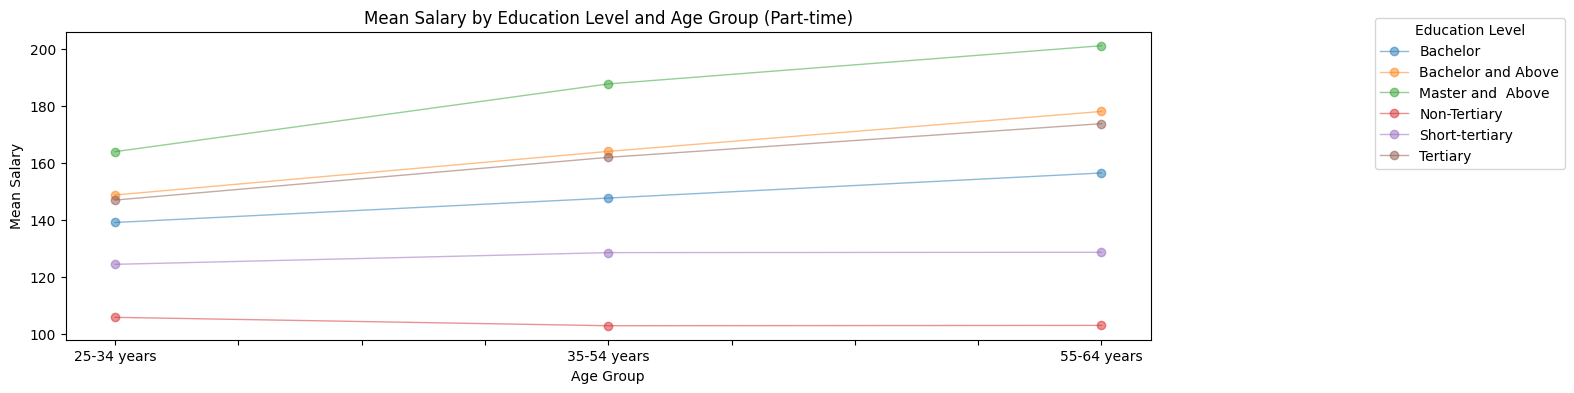

In [200]:
age_edu_mean = part_time_data.pivot_table('Value', index='Age', columns='Education', aggfunc='mean', observed=False )

ax = age_edu_mean .plot(figsize=(14, 4),
                            lw=1,
                            alpha=0.5,
                            marker='o',
                            title='mean Salary by Education Level and Age Group (Part-time)')


ax.set_title("Mean Salary by Education Level and Age Group (Part-time)")
ax.set_ylabel('Mean Salary')
ax.set_xlabel('Age Group')

ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.8), title='Education Level')

<div style="background-color:#ADD8E6;">
Across all age groups and job types, the higher the level of education, the higher the median/mean salary.
Median/mean salaries tend to increase with age for all levels of education, reflecting career progression and experience.
The economic benefits of higher education are clear, with median/mean salaries consistently highest for those with "master's and above" degrees.
Even for those with non-tertiary qualifications, the median/mean pay increases gradually with age, but the gap is still large and slow and small compared to tertiary education levels.

<div style="background-color:#F2FBEF;">
<p>Divide income into 5 bins and analyze the age distribution within each income bracket in different regions.</p>
</div>

In [202]:
data_ed['Income Bins'] = pd.qcut(data_ed['Value'], q=3, labels=['Low', 'Medium', 'High'])
regions = ['Europe', 'South America', 'Asia', 'Oceania', 'North America', 'Central America', 'Middle East']

In [204]:
bin_age_proportions = data_ed.groupby(['Region', 'Income Bins', 'Age'], observed=False).size().reset_index(name='Count')
total_counts = data_ed.groupby(['Region', 'Income Bins'], observed=False).size().reset_index(name='Total')
bin_age_proportions = pd.merge(bin_age_proportions, total_counts, on=['Region', 'Income Bins'])
bin_age_proportions['Proportion'] = bin_age_proportions['Count'] / bin_age_proportions['Total']

print(bin_age_proportions)

           Region Income Bins          Age  Count  Total  Proportion
0            Asia         Low  25-34 years    105    207    0.507246
1            Asia         Low  35-54 years     54    207    0.260870
2            Asia         Low  55-64 years     48    207    0.231884
3            Asia      Medium  25-34 years    123    414    0.297101
4            Asia      Medium  35-54 years    156    414    0.376812
..            ...         ...          ...    ...    ...         ...
58  South America      Medium  35-54 years    276    798    0.345865
59  South America      Medium  55-64 years    246    798    0.308271
60  South America        High  25-34 years    135    477    0.283019
61  South America        High  35-54 years    156    477    0.327044
62  South America        High  55-64 years    186    477    0.389937

[63 rows x 6 columns]


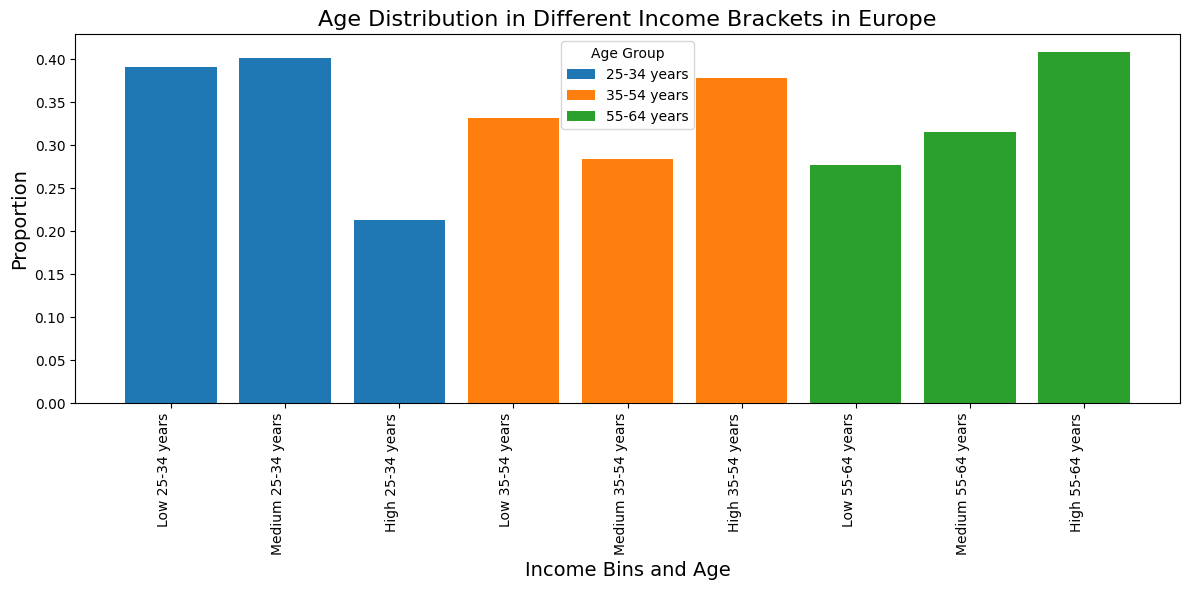

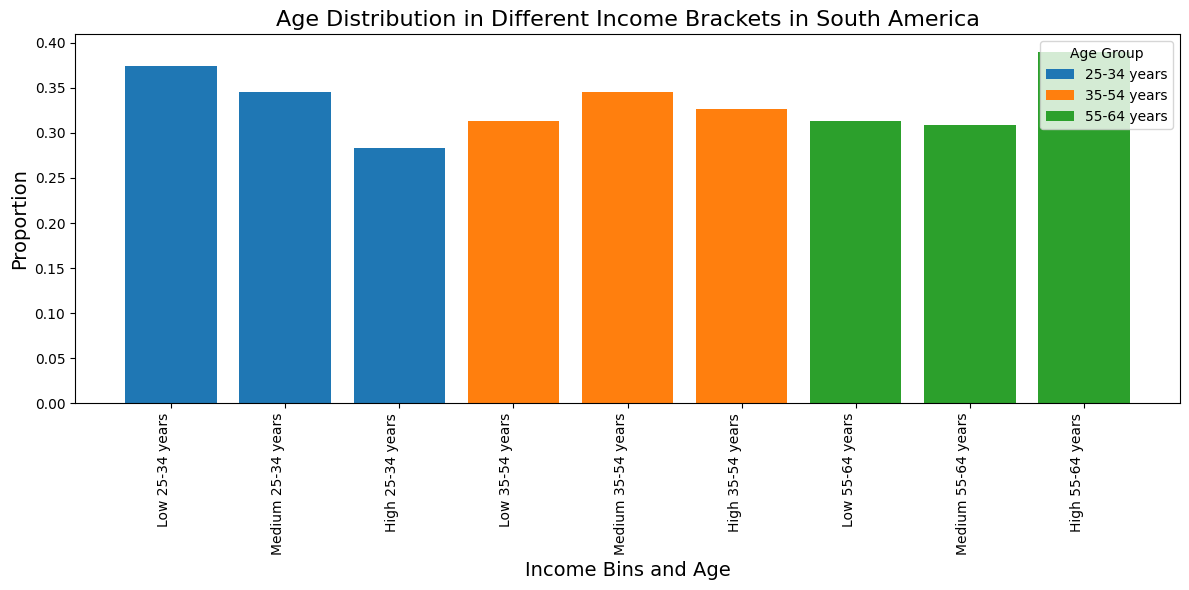

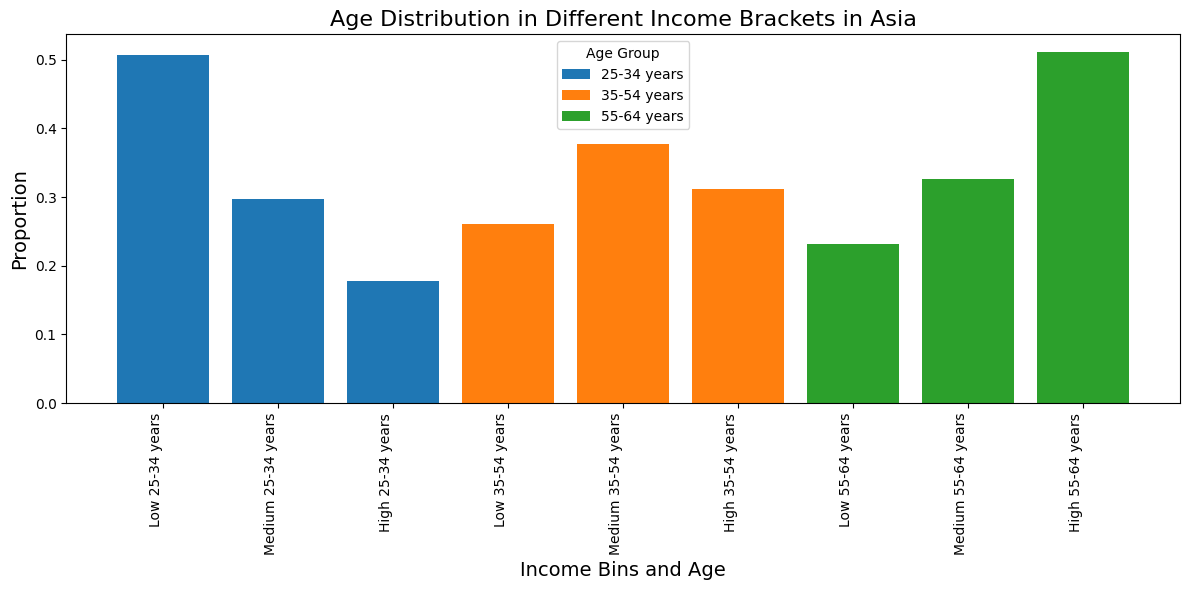

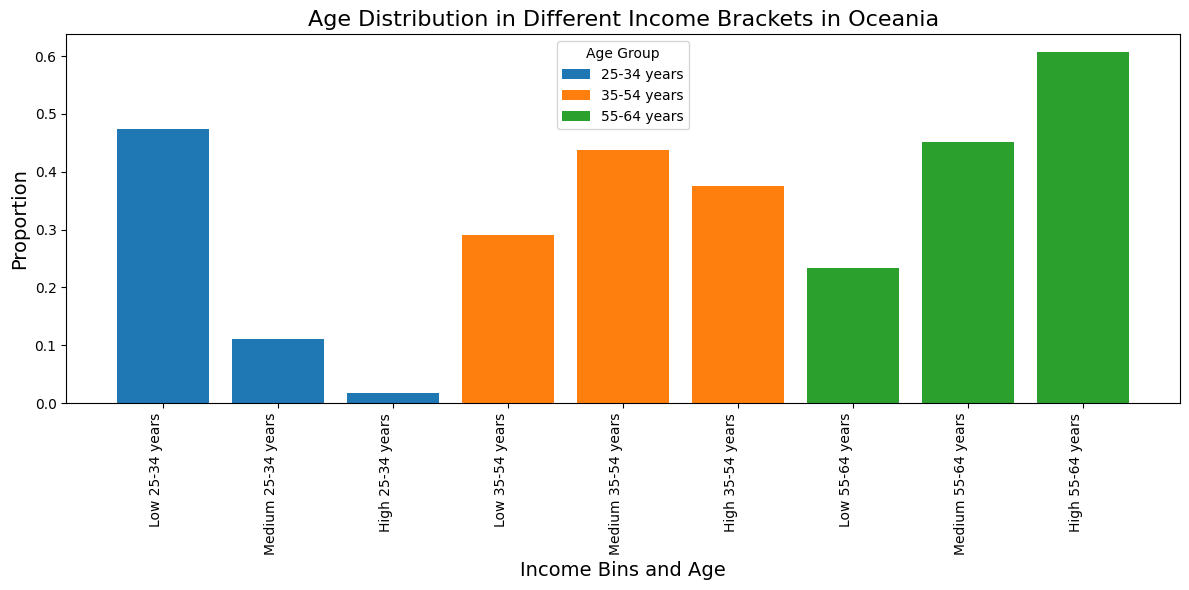

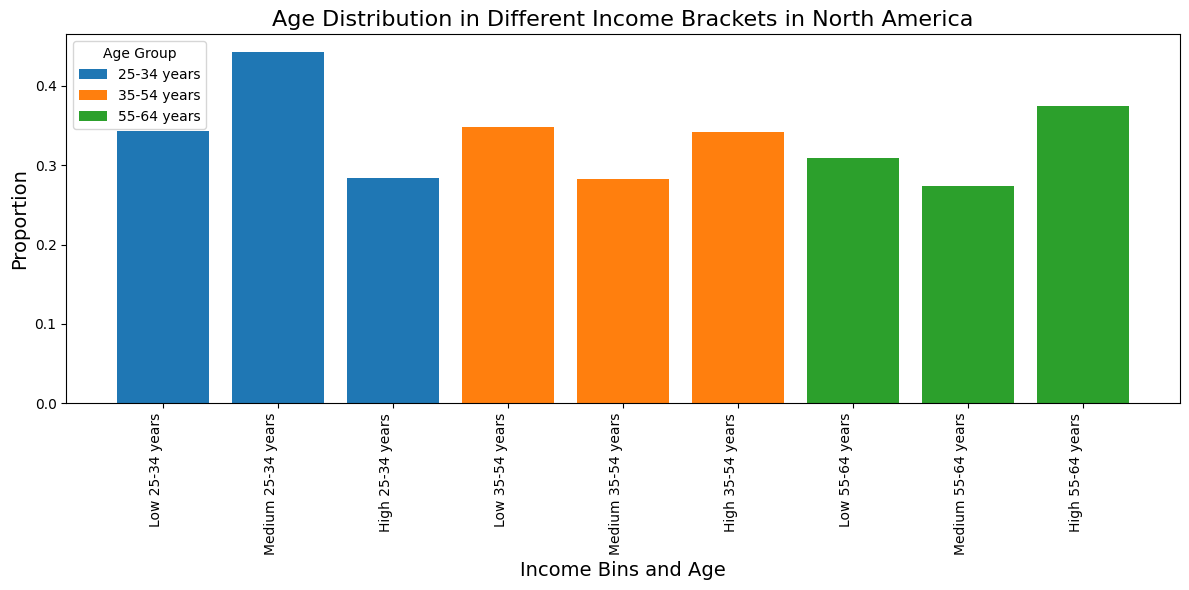

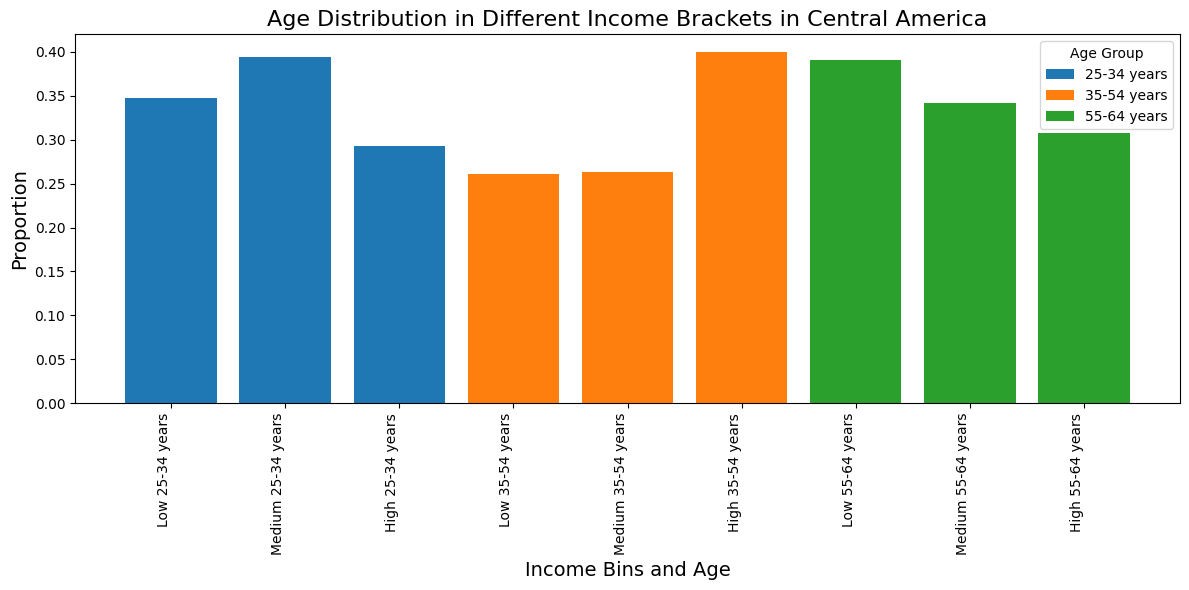

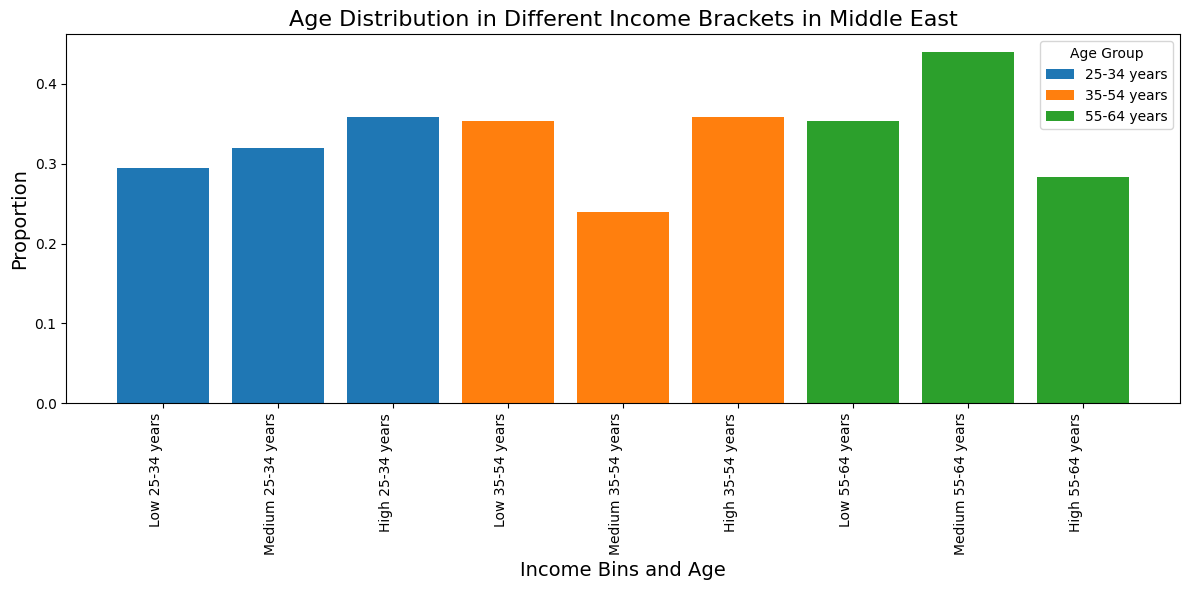

In [205]:
def plot_age_proportions(proportions, regions):
    for region in regions:
        region_data = bin_age_proportions[bin_age_proportions['Region'] == region]
        fig, ax = plt.subplots(figsize=(12, 6))

        for age_group in region_data['Age'].unique():
            age_group_data = region_data[region_data['Age'] == age_group]
            ax.bar(age_group_data['Income Bins'].astype(str) + ' ' + age_group, age_group_data['Proportion'], label=age_group)

        ax.set_title(f'Age Distribution in Different Income Brackets in {region}', fontsize=16)
        ax.set_xlabel('Income Bins and Age', fontsize=14)
        ax.set_ylabel('Proportion', fontsize=14)
        ax.legend(title='Age Group')

        plt.xticks(rotation=90, ha='right')
        plt.tight_layout()
        plt.show()
plot_age_proportions(bin_age_proportions, regions)

<div style="background-color:#ADD8E6;">
The starting salary stage (25-34 years) is generally more prevalent in the lower-middle income brackets, and the older age group (55-64 years) tends to be more prevalent in the upper income brackets
The imbalance in incomes of the same age group in different regions highlights the different imbalances in economic development across regions.

<div style="background-color:#F2FBEF;">
<p>Analyze the education level distribution within each income bracket across different regions.</p>
</div>

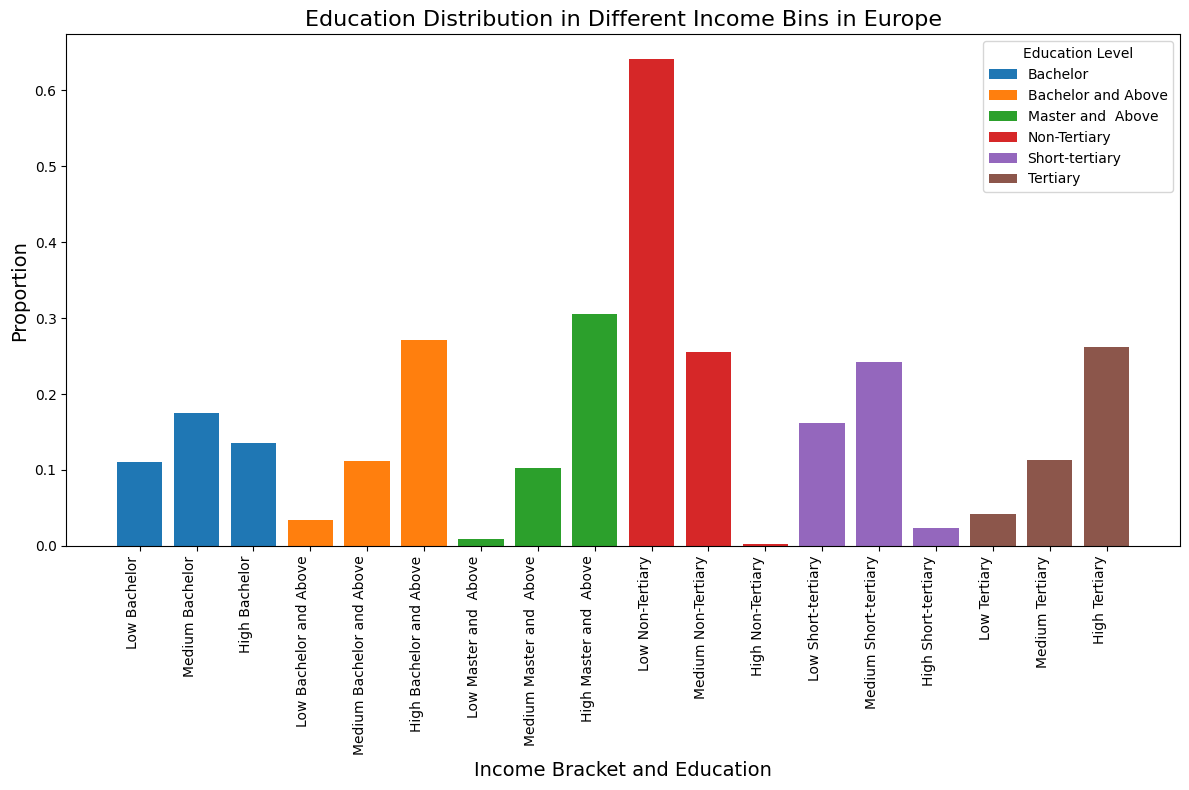

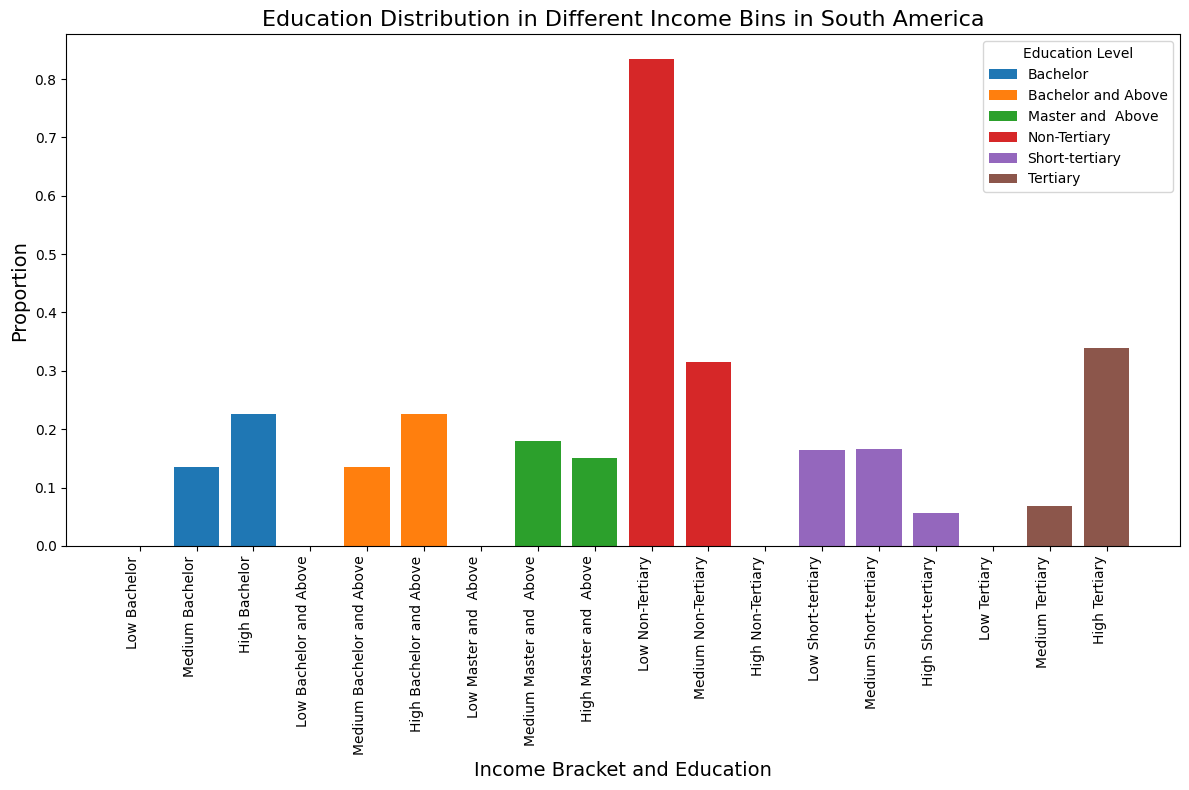

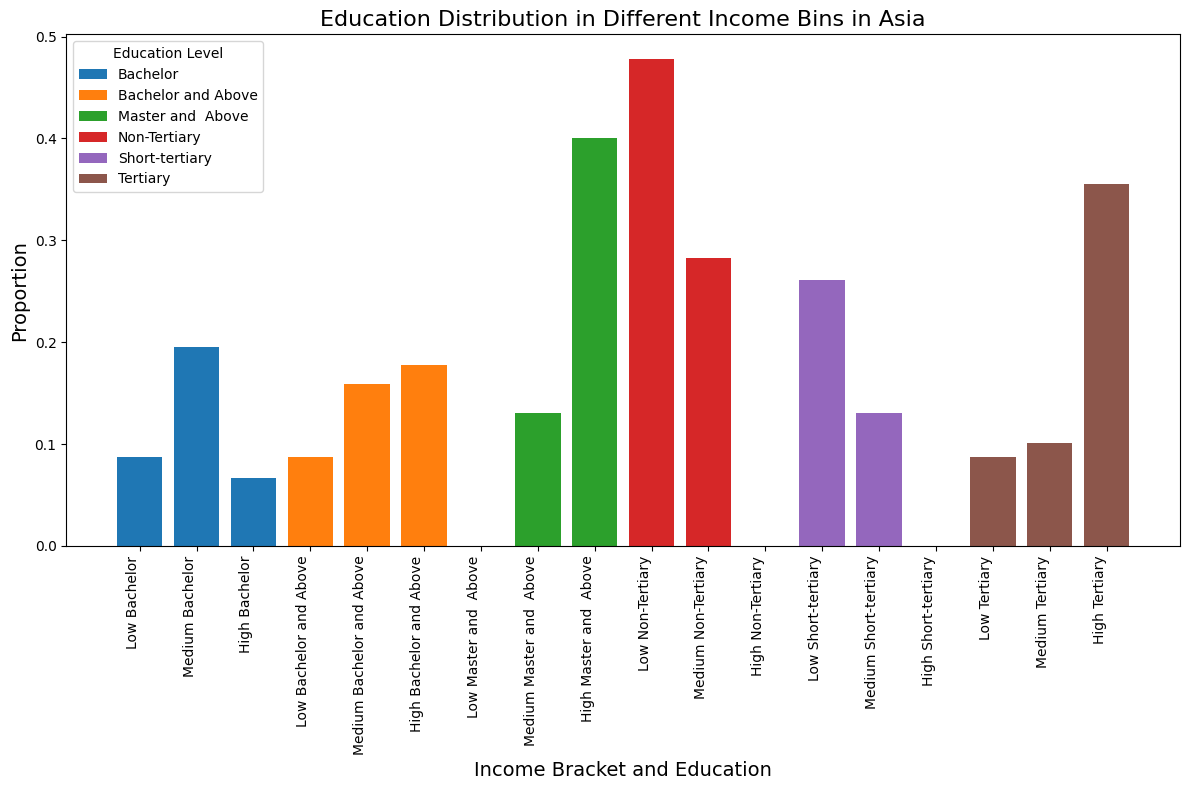

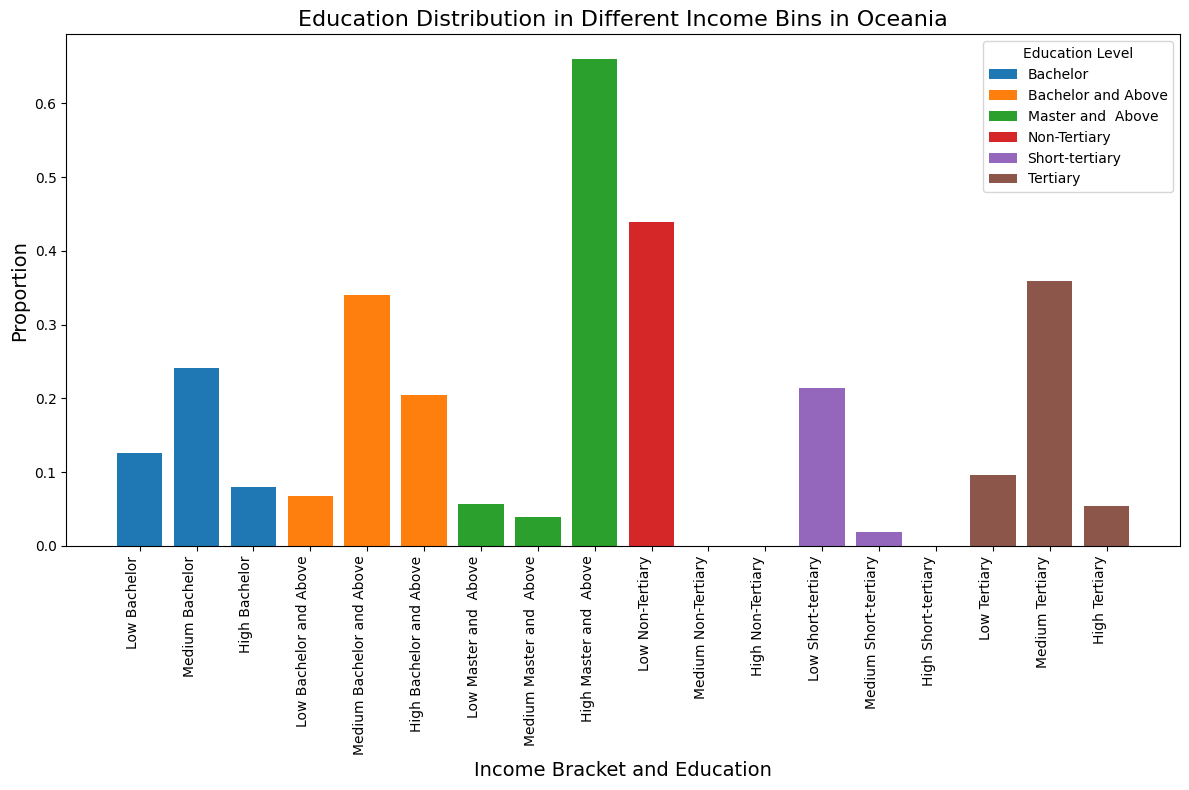

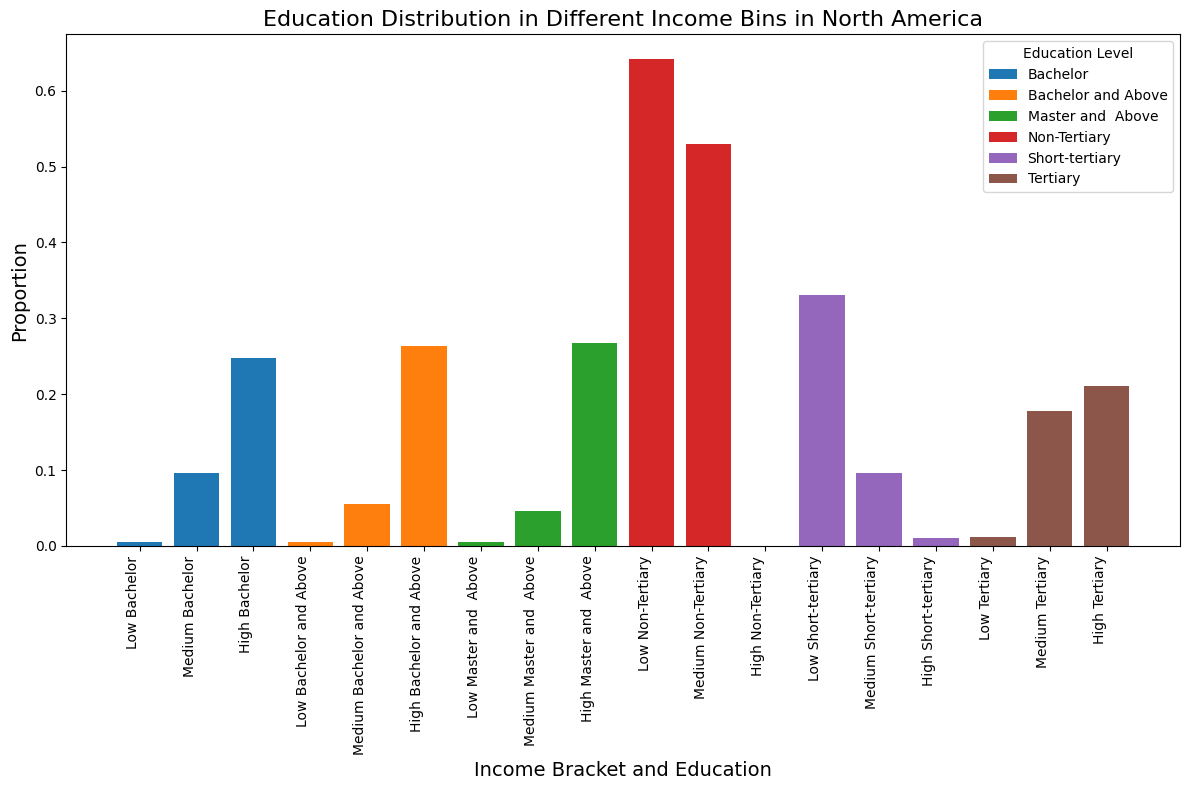

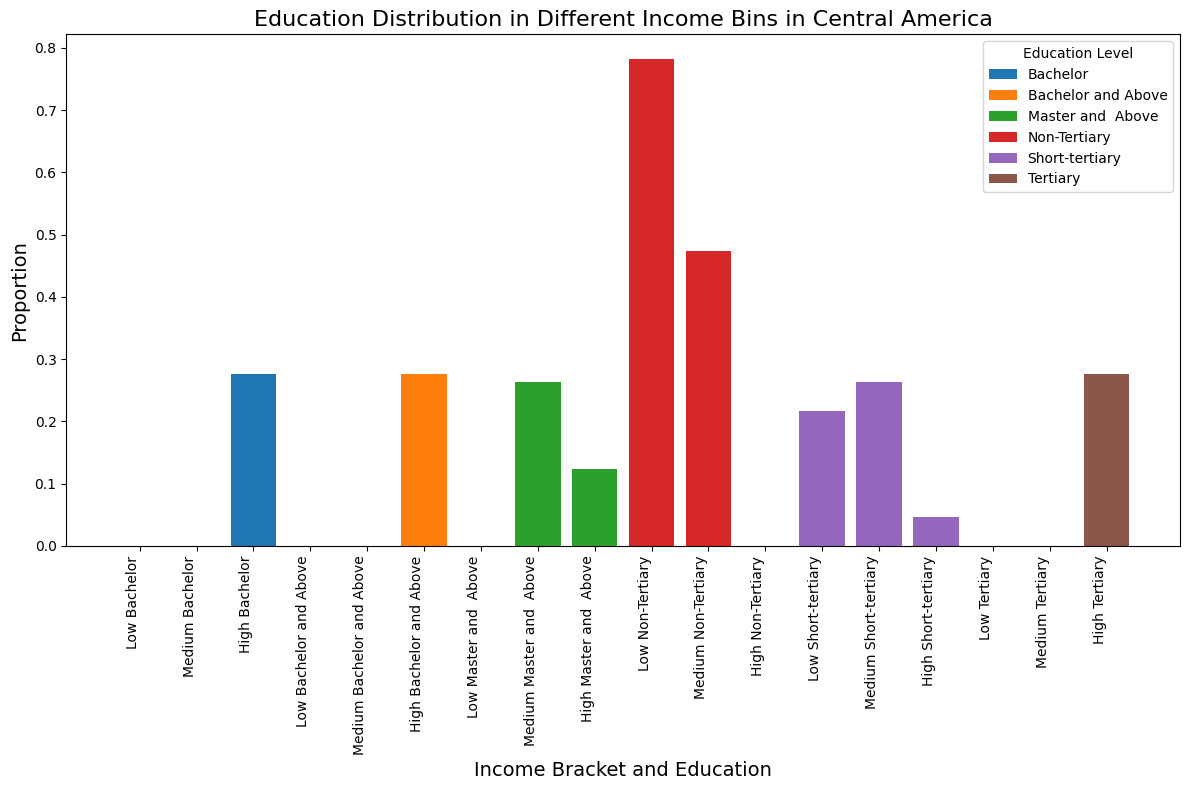

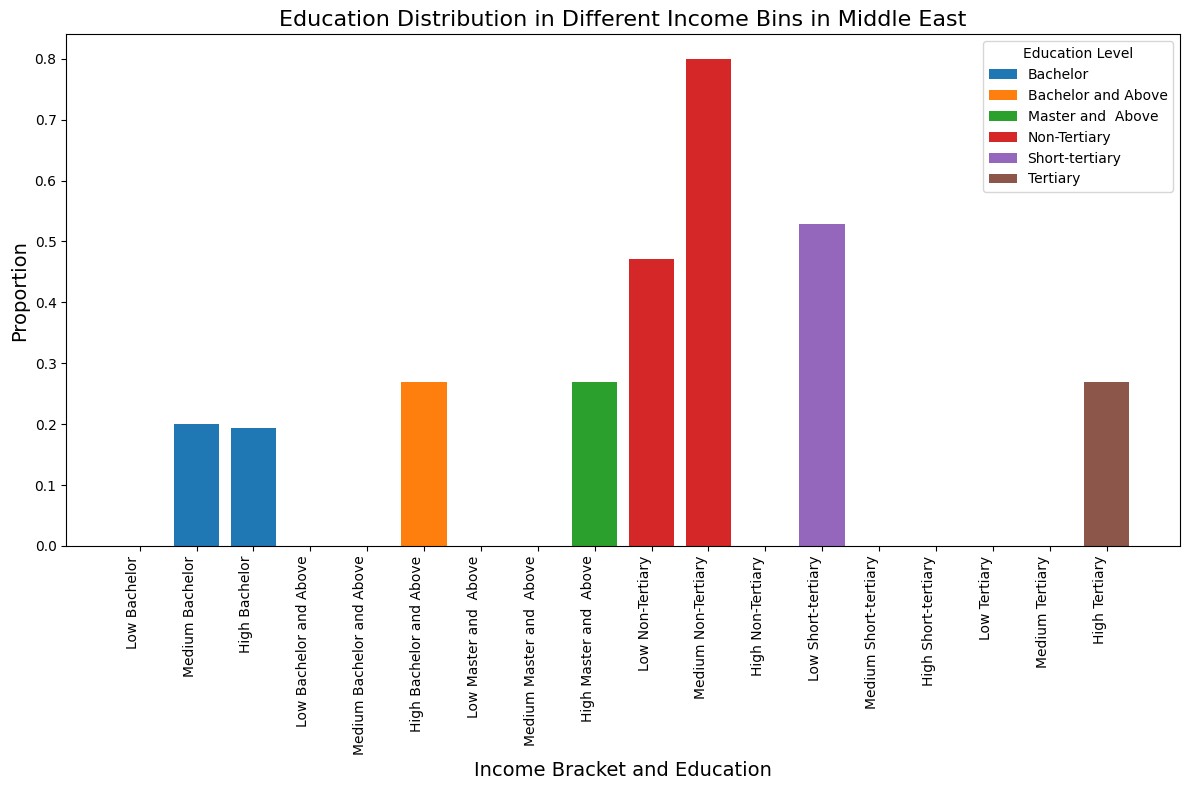

In [208]:
bin_education_proportions = data_ed.groupby(['Region', 'Income Bins', 'Education'], observed=False).size().reset_index(name='Count')
total_counts = data_ed.groupby(['Region', 'Income Bins'], observed=False).size().reset_index(name='Total')
bin_education_proportions = pd.merge(bin_education_proportions, total_counts, on=['Region', 'Income Bins'])
bin_education_proportions['Proportion'] = bin_education_proportions['Count'] / bin_education_proportions['Total']

def plot_bin_education_proportions(bin_education_proportions, regions):
    for region in regions:
        region_data = bin_education_proportions[bin_education_proportions['Region'] == region]
        fig, ax = plt.subplots(figsize=(12, 8))

        for edu_level in region_data['Education'].unique():
            edu_level_data = region_data[region_data['Education'] == edu_level]
            ax.bar(edu_level_data['Income Bins'].astype(str) + ' ' + edu_level, edu_level_data['Proportion'], label=edu_level)

        ax.set_title(f'Education Distribution in Different Income Bins in {region}', fontsize=16)
        ax.set_xlabel('Income Bracket and Education', fontsize=14)
        ax.set_ylabel('Proportion', fontsize=14)
        ax.legend(title='Education Level')
        plt.xticks(rotation=90, ha='right')

        plt.tight_layout()
        plt.show()

plot_bin_education_proportions(bin_education_proportions, regions)

<div style="background-color:#ADD8E6;">
In all regions, tertiary education levels (e.g. "Masters and above" and "Bachelors and above") are consistently associated with higher income tiers.
Lower levels of education (e.g. "non-tertiary") are more often found in lower income groups, suggesting that those without tertiary education have limited earning potential.

<div style="background-color:#F2FBEF;">
<p>Analyze the gender distribution within each income bracket across different regions</p>
</div>

/tmp/ipython-input-207-2223015580.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_gender_proportions = data_ed[data_ed['Gender'].isin(['F', 'M'])].groupby(['Region', 'Income Bins', 'Gender']).size().reset_index(name='Count')
/tmp/ipython-input-207-2223015580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data_ed[data_ed['Gender'].isin(['F', 'M'])].groupby(['Region', 'Income Bins']).size().reset_index(name='Total')


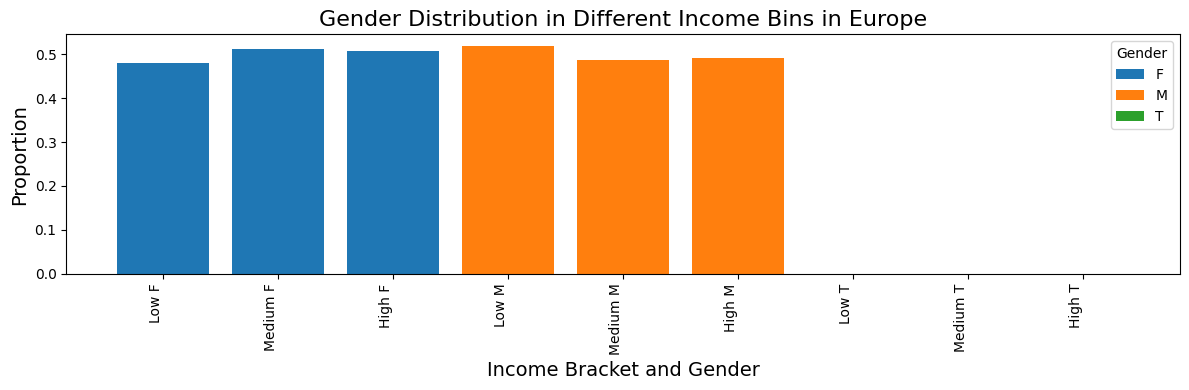

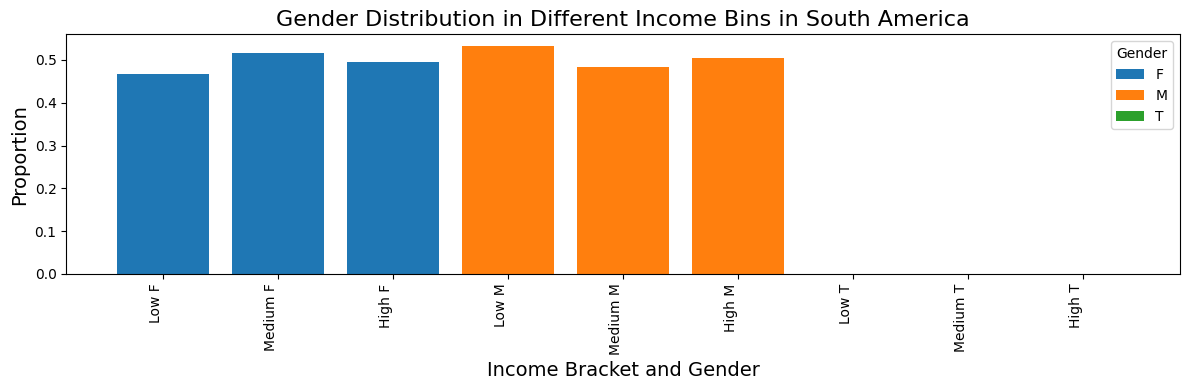

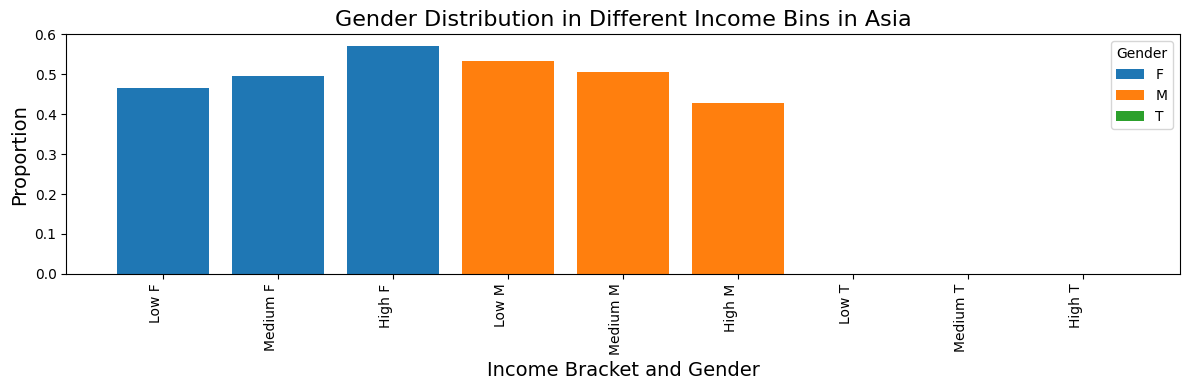

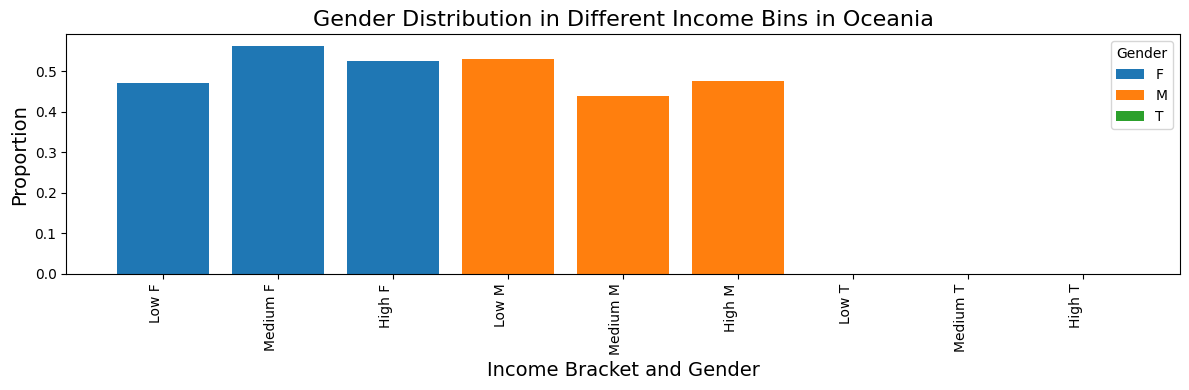

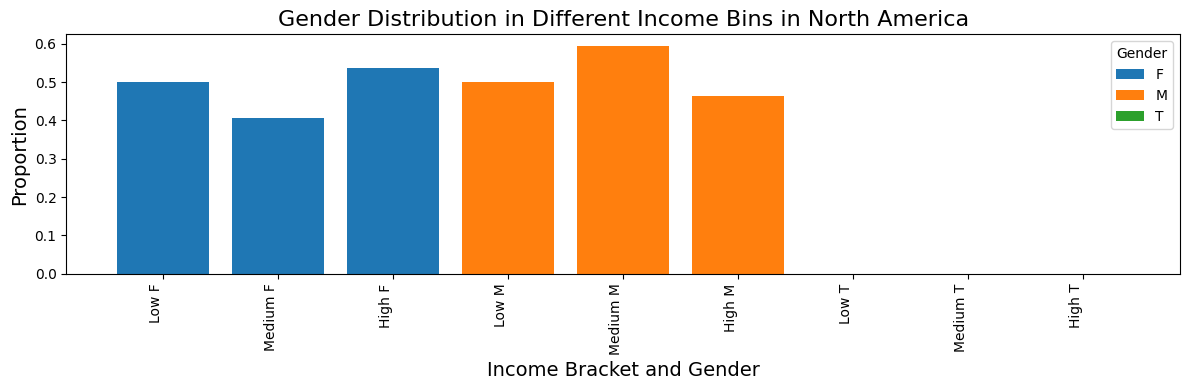

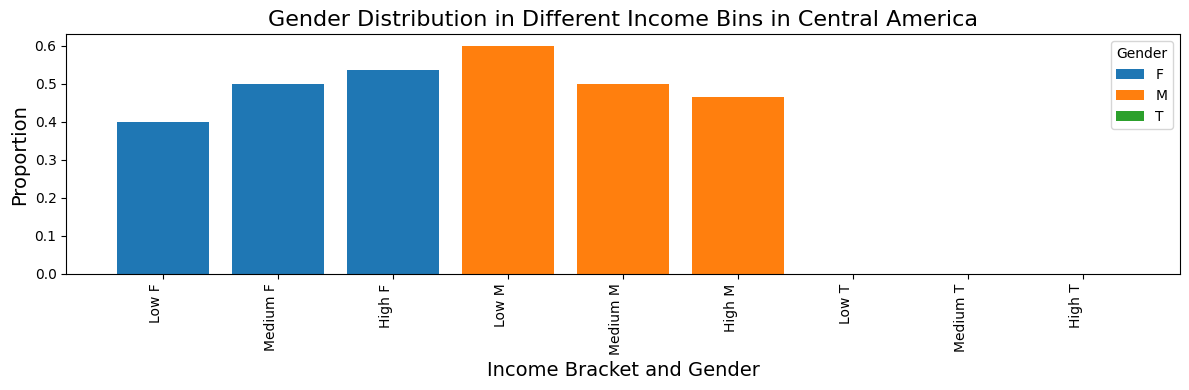

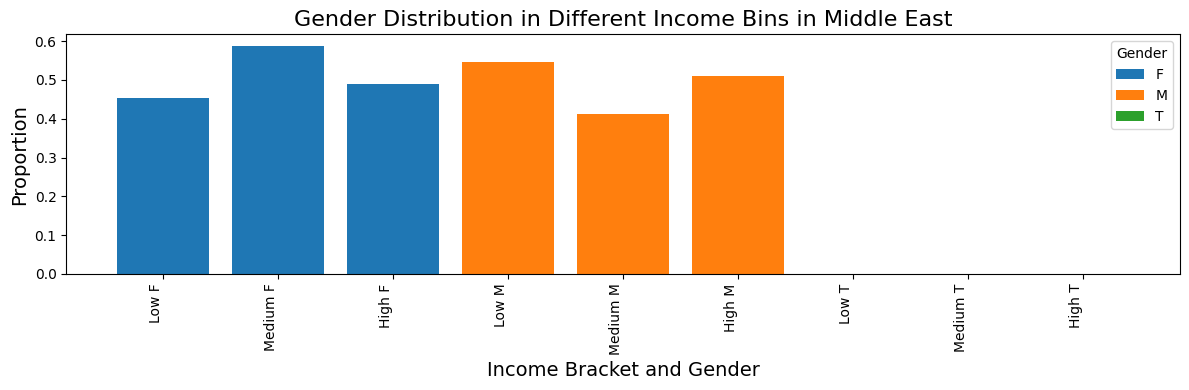

In [207]:
bin_gender_proportions = data_ed[data_ed['Gender'].isin(['F', 'M'])].groupby(['Region', 'Income Bins', 'Gender']).size().reset_index(name='Count')
total_counts = data_ed[data_ed['Gender'].isin(['F', 'M'])].groupby(['Region', 'Income Bins']).size().reset_index(name='Total')
bin_gender_proportions = pd.merge(bin_gender_proportions, total_counts, on=['Region', 'Income Bins'])
bin_gender_proportions['Proportion'] = bin_gender_proportions['Count'] / bin_gender_proportions['Total']


def plot_bin_gender_proportions(bin_gender_proportions, regions):
    for region in regions:
        region_data = bin_gender_proportions[bin_gender_proportions['Region'] == region]
        fig, ax = plt.subplots(figsize=(12, 4))

        for gender in region_data['Gender'].unique():
            gender_data = region_data[region_data['Gender'] == gender]
            ax.bar(gender_data['Income Bins'].astype(str) + ' ' + gender, gender_data['Proportion'], label=gender)

        ax.set_title(f'Gender Distribution in Different Income Bins in {region}', fontsize=16)
        ax.set_xlabel('Income Bracket and Gender', fontsize=14)
        ax.set_ylabel('Proportion', fontsize=14)
        ax.legend(title='Gender')
        plt.xticks(rotation=90, ha='right')

        plt.tight_layout()
        plt.show()

plot_bin_gender_proportions(bin_gender_proportions, regions)

<div style="background-color:#ADD8E6;">
Although there are regional differences, men are consistently overrepresented in the higher income groups and women tend to be overrepresented in the lower and middle income groups.
The data highlights the persistent gender income gap across regions, with males generally moving into the higher income brackets more easily than females.

<hr style="border: none; height: 2px; background-color: black;">

## Results

To identify insights from the processed OECD dataset, we utilized visual analytics methods. These include bar charts, stacked bar charts, line plots, and scatter plots. Key findings are summarised as follows:

- **Income Inequality Across Countries:**  
  There is a substantial variation in gross income across the 44 countries. Countries such as Luxembourg, the United States, and Switzerland consistently show higher average incomes, while others like Mexico and Hungary fall on the lower end.

- **Educational Attainment and Earnings:**  
  A positive correlation exists between educational attainment and income levels. Individuals with tertiary education (e.g., ISCED 5-8) consistently earn significantly more than those with lower secondary or below (ISCED 0-2), across nearly all countries.

- **Gender Pay Gap:**  
  The data shows a consistent gender gap in earnings across all education levels, with men earning more than women. Interestingly, this gap is narrower in countries with more equitable social policies.

- **Age and Salary Progression:**  
  Income tends to increase with age up to the 45–54 group, after which it either plateaus or slightly declines. This trend is especially pronounced among individuals with higher education.

- **Income Distribution by Demographics:**  
  Visualization of income brackets reveals that men are overrepresented in higher income bands, especially among those aged 35–54 with tertiary education. Women and younger individuals tend to dominate lower brackets.

- **Regional Comparison of Fairness:**  
  Northern and Western European countries show relatively fairer income distributions and smaller gender gaps, while Eastern European and Latin American countries exhibit higher inequality.

These results highlight the multifaceted effects of education, gender, age, and regional context on income disparities.



## Conclusion

The OECD data analysis clearly demonstrates how **educational attainment, gender, and age** shape income distribution globally. Our exploration reveals that:

- Higher education significantly boosts earnings potential.
- Gender-based income disparities persist even at the highest education levels.
- Age-related income patterns reflect both career development and potential structural ceilings.

This analysis provides evidence for policymakers and educators to focus on expanding access to higher education and addressing structural gender inequalities. Future work could integrate additional socioeconomic variables—such as employment type, working hours, or industry sector—for a more comprehensive understanding of income drivers. Our approach highlights the power of data analytics in revealing complex social and economic trends through clear, interpretable visualisations.